## Pre-requisite: Library requirements

In [1]:
# # !nvidia-smi
%pip install numpy
%pip install matplotlib
%pip install glob
%pip install os 
%pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import glob
import os

In [3]:
%ls
%ls ../data
%ls ../data/frac_map | head -10

0_Cluster_Rivers.jpeg/                   8523-Ying.ipynb*
8523_Common.ipynb*                       8523_Ying_UCL_Experiments.ipynb
8523_data_processing_70.ipynb            8523_Ying_UCL_Experiments-Task1.ipynb
8523_data_processing_80.ipynb            core.3755254*
8523_data_processing_90.ipynb            core.3779393*
8523_data_processing_kmeans_taks1.ipynb  core.3780321*
8523_Shonal2.ipynb*                      explanation.jpg*
8523-Shonal.ipynb*                       model_training_history.png
8523-Tanisha.ipynb*                      README.md*
8523_Task2_RTL_Exp_100_317.ipynb*        Shonal3.ipynb*
8523_Task2_RTL_Exp_70_2726.ipynb         Shonal4.ipynb*
8523_Task2_RTL_Exp_90_1940.ipynb         Shonal5.ipynb*
8523_Task2_UCL_Exp_100_317.ipynb         Shonal6_visualization.ipynb*
8523_Task2_UCL_Exp_70_2726.ipynb         Shonal7_fixing80.ipynb
8523_Task2_UCL_Exp_90_1940.ipynb         split_dataset.ipynb*
8523_Task2_UCL_Pipeline_Testing.ipynb*   TODO For Task 2
8523_Task2_Visualization.i

# Classification
## Phase 01 - Data Visualization
### 1. Extract data and save them into frac_map and time_series

- Each fraction map is of shape (1,64,64) and time series is of shape (442,1)
- There are 26754 data in total in fraction map and time series

In [4]:
fracmaps_dir = '../data/frac_map'
frac_maps = os.listdir(fracmaps_dir)
timeseries_dir = '../data/time_series'
time_series = os.listdir(timeseries_dir)

total_maps = len(frac_maps) # 26754
total_ts = len(time_series) # 26754
print("total_maps len is ", total_maps, "total_ts len is ", total_ts)

## save fraction map and time series into img arrays
for i in range(0, total_maps):
    fm = frac_maps[i]
    frac_maps[i] = np.load(os.path.join(fracmaps_dir, fm), allow_pickle=True)
    ts = time_series[i]
    time_series[i] = np.load(os.path.join(timeseries_dir, ts), allow_pickle=True)
    

print(frac_maps[0].shape) ## (1,64,64)
print(time_series[0].shape) ## (442, 1)

total_maps len is  26754 total_ts len is  26754
(1, 64, 64)
(442, 1)


In [5]:
t = os.listdir('../data/frac_map')
t[0]

'ID_742140_frac_map.npy'

### 2. Visualization of Fraction Maps

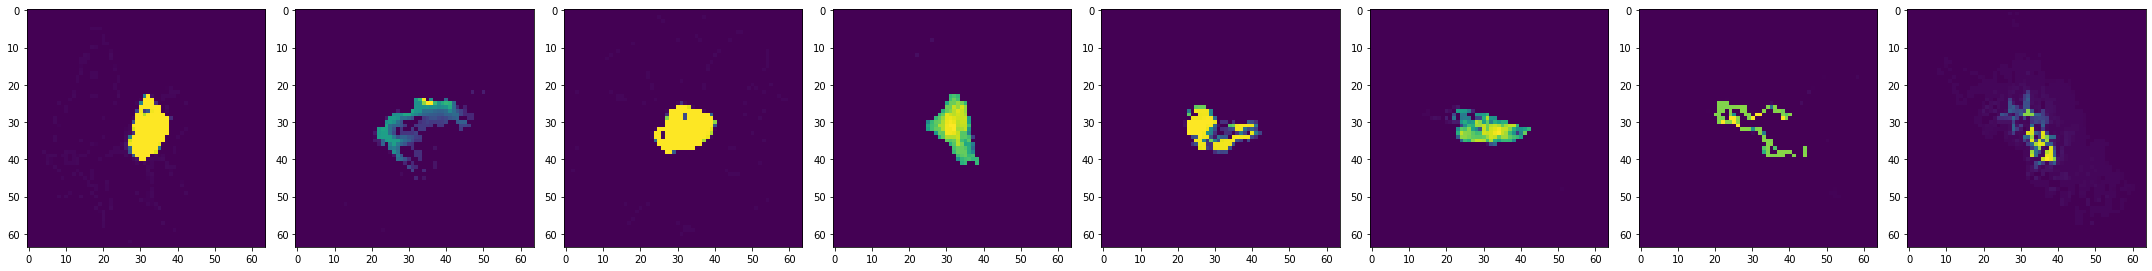

In [6]:
bracket = 3000
# total_maps = 26754
fig, axes = plt.subplots(1, int(total_maps/bracket), figsize=(30, 10))
ax = axes.ravel()

## print first 8 fraction maps in a row
for i in range(0, int(total_maps/bracket)):
    img_array = frac_maps[i]
    img_array = np.squeeze(img_array, axis = 0)
    ax[i].imshow(img_array) #, cmap="gray") - for task 1, we don't care about the color, focus more on shape for river classification

# for a in ax:
#     a.set_axis_off()
    
plt.tight_layout()
plt.show()

In [ ]:
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
    plt.subplot(3,3,i+1)
    img_array = frac_maps[i]
    img_array = np.squeeze(img_array, axis = 0)
    plt.imshow(img_array)

### 3. Visualization of Time Series

(442, 1)


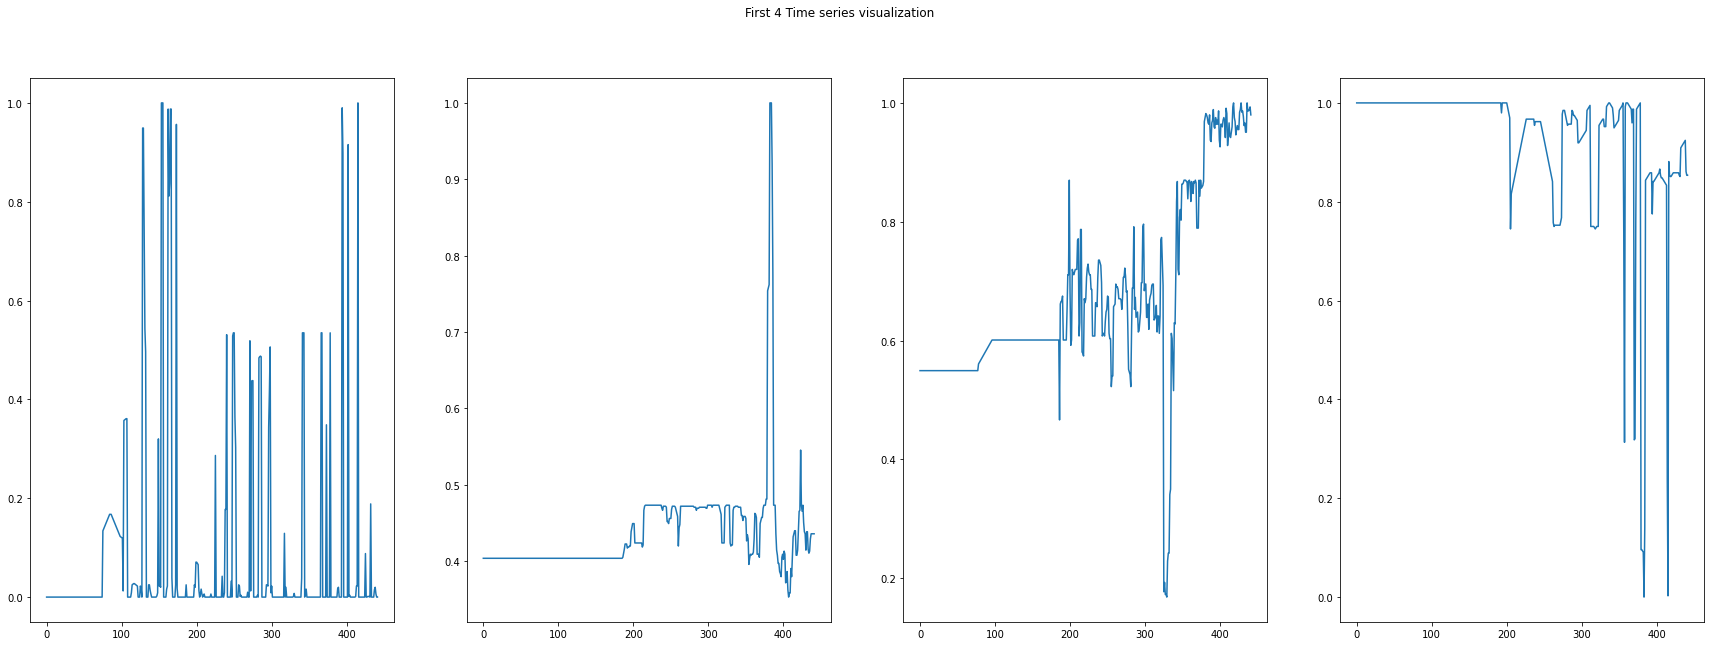

In [8]:
# visualiza a single time series - time_series[0]

print(time_series[0].shape) # (442, 1)

fig, axes = plt.subplots(1, 4, figsize=(30, 10))
fig.suptitle('First 4 Time series visualization')
## print first 4 time series in a row
for i in range(0, 4):
    ts_array = time_series[i]
    axes[i].plot(ts_array)
    

In [9]:
# helper function for visualizing time series array
def visualize_ts(ts):
    plt.plot(ts)
    plt.show()

def visualize_subplots(n, arr):
    fig, axes = plt.subplots(1, n, figsize=(30, 10))
    fig.suptitle('First ' + str(n) + ' Time series visualization')
    for i in range(0, n):
        array = arr[i]
        axes[i].plot(array)
    
# visualize_subplots(1,time_series)

### 4. Visualization of corresponding fraction map and time series of river

### 5. The following are the labels info in the ../data/label_info folder as ground truth.

#### Label Array - 1000000 in total

| Label      | Description |
| ----------- | ----------- |
| 0      | Unknown       |
| 1   | Farm        |
| 2   | Reservoir        |
| 3   | River        |
| 4   | Stable Lakes        |
| 5   | Seasonal Lakes        |

array[no] = C → ID no is class C


#### Continent info

| Label      | Description |
| ----------- | ----------- |
| 1   | Asia        |
| 2   | North America        |
| 3   | Europe        |
| 4   | Africa        |
| 5   | South America        |
| 6   | Oceania        |
| 7   | Australia        |
| 8   | Antarctica        |

array[no] = C → ID no is in Continent C


In [10]:
ID_labels = '../label_info/all_IDs_labels.npy'
ID_labels = np.load(ID_labels, allow_pickle=True)

# size of all labels
print(ID_labels.shape) ## (1000000,)

# check size of each label
print(np.where(ID_labels==0)[0].shape) # (979799,) - unknown
print(np.where(ID_labels==1)[0].shape) # (427,) - farm
print(np.where(ID_labels==2)[0].shape) # (18707,) - reservoir
print(np.where(ID_labels==3)[0].shape) # (317,) - river
print(np.where(ID_labels==4)[0].shape) # (143,) - stable lakes
print(np.where(ID_labels==5)[0].shape) # (288,) - seasonal lakes
print("labels = 6", np.where(ID_labels==6)[0].shape) # ? 52

print("labels = 7", np.where(ID_labels==7)[0].shape) # ? 255

print("labels = 8", np.where(ID_labels==8)[0].shape) # ? 12


fm_river_labels = np.where(ID_labels==3)[0]
fm_river_labels
# print(fm_river_labels)
# fname = '../data/frac_map/ID_409869_frac_map.npy'
# s = np.load(fname, allow_pickle=True)
# river_0 = np.squeeze(s, axis = 0)
# plt.imshow(river_0)

# 979799+427+18707+317+143+288 = 999681
print(979799+427+18707+317+143+288+255+12+52)
np.unique(ID_labels)

(1000000,)
(979799,)
(427,)
(18707,)
(317,)
(143,)
(288,)
labels = 6 (52,)
labels = 7 (255,)
labels = 8 (12,)
1000000


array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=uint8)

In [11]:
# check fms

In [12]:
ID_labels[409869]

3

#### - Save all river fraction maps in the fm_rivers and river time series in the ts_rivers array

In [13]:
# extract river from fraction maps and time series maps
river_ids = np.where(ID_labels==3)[0]
print(river_ids.shape) # 317
#fracmaps_dir = '../data/frac_map'
#timeseries_dir = '../data/time_series'
fm_rivers = []
ts_rivers = []
pre = 'ID_'
fm_post = '_frac_map.npy'
ts_post = '_time_series.npy'

for sid in river_ids:
    fm_name = pre + str(sid) + fm_post
    ts_name = pre + str(sid) + ts_post
    fm_path = os.path.join(fracmaps_dir, fm_name)
    ts_path = os.path.join(timeseries_dir, ts_name)
    fm_rivers.append(np.load(fm_path, allow_pickle=True))
    ts_rivers.append(np.load(ts_path, allow_pickle=True))
#     print(np.load(ts_path, allow_pickle=True).shape) # (442,1)

fm_rivers = np.array(fm_rivers)
ts_rivers = np.array(ts_rivers)
print(fm_rivers.shape) # should be 317
print(ts_rivers.shape) # should be 317

# visualize the first river fraction map
# river_0 = np.squeeze(fm_rivers[0], axis = 0)
# plt.imshow(river_0)

(317,)
(317, 1, 64, 64)
(317, 442, 1)


In [14]:
## helper function for visualizing the fraction map and time series of the same river
def visualize_river(idx):
    fig, axes = plt.subplots(1, 2, figsize=(30, 10))
    fig.suptitle('Corresponding fraction map and time series visualization of river ' + str(idx))

    river = np.squeeze(fm_rivers[idx], axis = 0)
    axes[0].imshow(river)
    axes[1].plot(ts_rivers[idx])


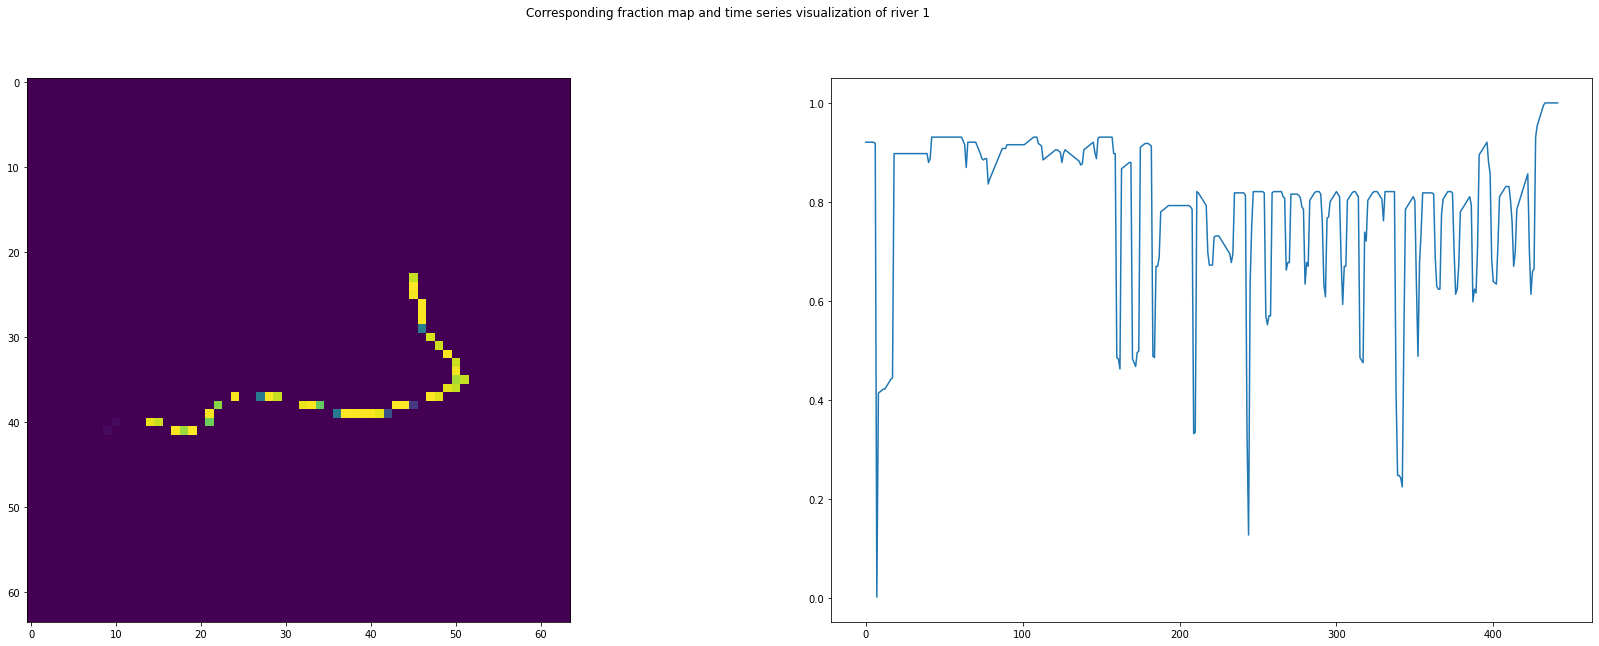

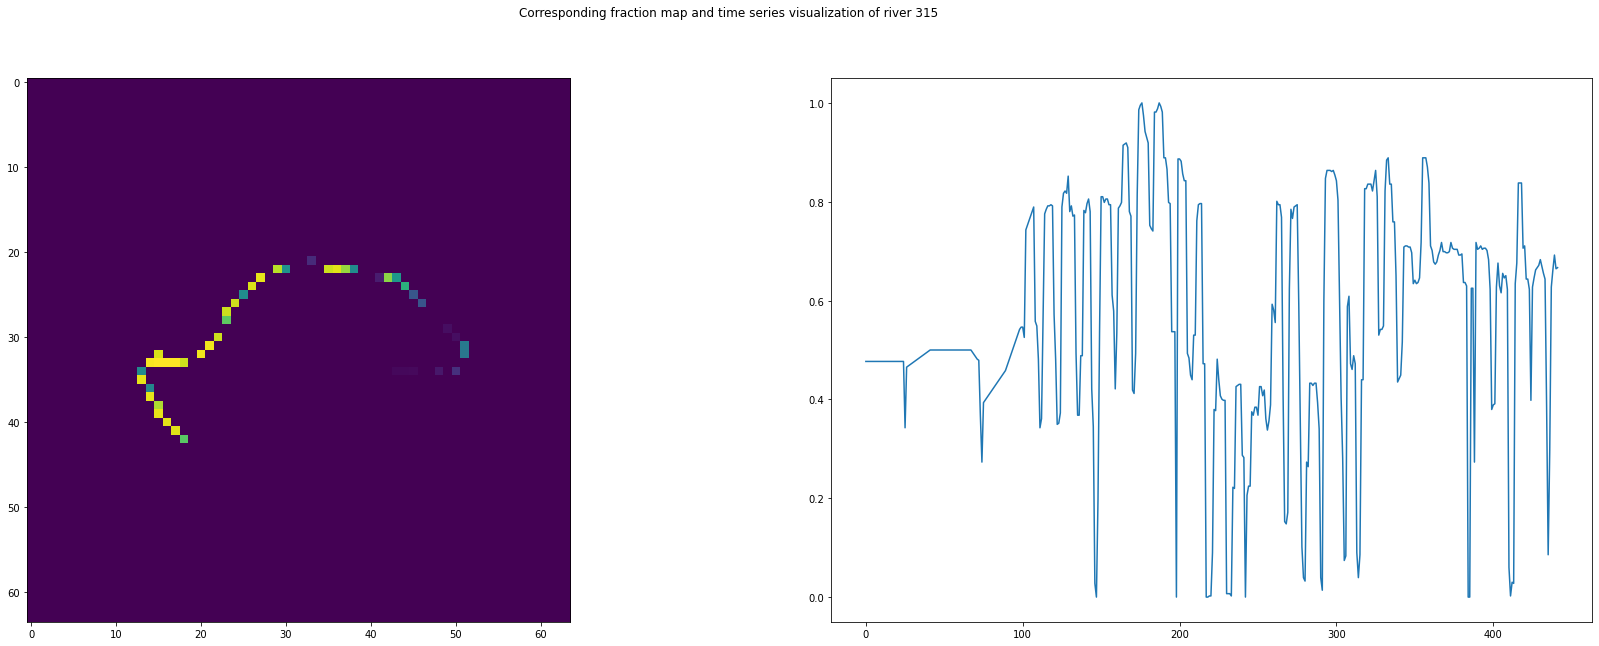

In [15]:
# There are 317 rivers, idx from [0, 316]
visualize_river(1)
visualize_river(315) # largest idx

## Phase 02 - Data Exploration

Every fraction_map is 64x64.

What are the values?

In [16]:
test_frac_arr = frac_maps[0]
# test_frac_arr
test_frac_arr[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

The values are floats between 0-1.

Let's visualize:

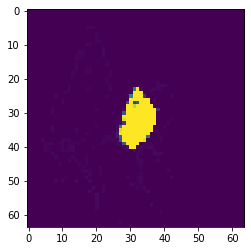

In [17]:
plt.imshow(test_frac_arr[0])

Let's print out the coordinates of each pixel that aren't 0.

In [18]:
nonzero = []

# 64*64 pixels
for i in range(len(test_frac_arr[0])):
    for j in range(len(test_frac_arr[0][i])):
        if test_frac_arr[0][i][j] != 0:
#             print("X:",j,"Y:",i,"Value:",test_frac_arr[0][i][j])
            nonzero.append((j,i,test_frac_arr[0][i][j]))

# nonzero

How many of the pixels are non zero?

In [19]:
# there are 64*64 = 4069 pixels in total in a single fraction map
print(len(nonzero),"(out of 4096) or ",(len(nonzero)/4096)*100,"%")

345 (out of 4096) or  8.4228515625 %


Let's see out of these 345 pixels, which ones are the highest value.

In [20]:
max = 0
count = 0
for i in nonzero:
    if i[2] > max:
        count = 0
        max = i[2]
    if i[2] == max:
        count += 1

print("max:",max,"count:",count)

max: 1.0 count: 111


Now let's see how many fraction maps we have.



26754
26754


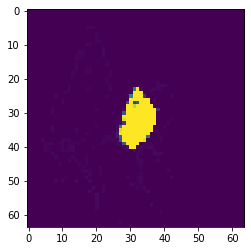

In [21]:
print(len(frac_maps))
print(len(time_series))
plt.imshow(frac_maps[0][0]) #frac_maps[i] is 1*64*64

# Preprocessing frac_maps

Currently, we have 26754 fraction maps. Each of these is of shape 1x64x64. Let's change that to 64x64 and aggregate them all into one array where each value is tuple in the form (name of file, 64x64 array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


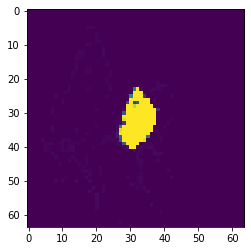

In [22]:
fms = [] # fraction map: contains each 26754 64*64 array

for i in range(0, len(frac_maps)):
    fms.append(frac_maps[i][0])
    
fms = np.array(fms)
print(fms[0])
plt.imshow(fms[0])

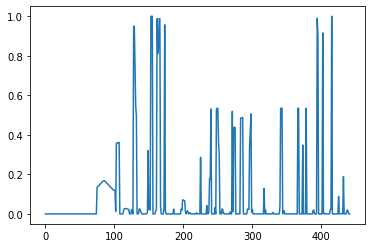

In [23]:
# time_series is saved in time_series array of size 442*1
plt.plot(time_series[0])

## Phase 03 - Classification Methods

In [24]:
%pip install -U scikit-learn scipy matplotlib
%pip install opencv-python
%pip install kmeanstf

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [25]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle
import re
import cv2
from kmeanstf import KMeansTF

2022-12-18 17:34:15.616582: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-18 17:34:16.052966: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /panfs/jay/groups/6/csci8523/lu000097/.local/lib/python3.7/site-packages/cv2/../../lib64:/panfs/roc/msisoft/cuda/10.0/lib64
2022-12-18 17:34:16.056287: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-18 17:34:18.356210: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:6

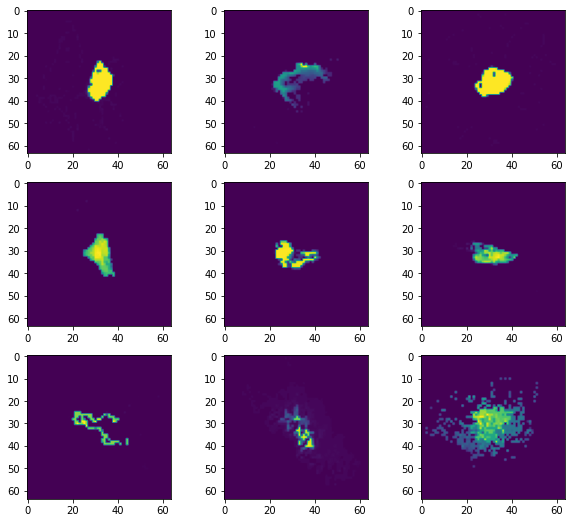

In [26]:
# plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(fms[i])

In [27]:
fm_filename = os.listdir('../data/frac_map') # has a 1-1 mapping with fms => fm_filename[i] is the filename of fms[i]
print(fm_filename[0])
ID_labels[0] # ID_labels is the ground truth array, len = 100,0000, ID_labels[ID] = class_no, ID is from filename

ID_742140_frac_map.npy


0

#### x_train is fms[i] which is a 64*64 2d array, y_train is ID_labels[getID(fm_filename, i)] which is a number

In [28]:
# a helper function which gets the ID of a fraction map array given the idx

def getID(fm_fn, idx):
    fn = fm_fn[idx] # get the file name
    fm_id = int(re.findall(r'\d+', fn)[0])
    return fm_id

getID(fm_filename, 1)

741138

In [29]:
# print examples in y_train
for i in range(5):
    print(ID_labels[i])
    
print(ID_labels[741138])

0
0
0
0
0
7


The output is from [0,5]. The ‘y_train’ and ‘y_test’ are numbers from 0 to 5 which indicate the class labels of the water body fraction map.

In [30]:
y_train = []
y_all = []
x_train = []
la6 = 0
la7 = 0
la8 = 0
la0 = 0
la3 = 0
for i in range(0, len(fms)):
    y_all.append(ID_labels[getID(fm_filename, i)])
    if (ID_labels[getID(fm_filename, i)] == 3):
        la3 += 1
    if (ID_labels[getID(fm_filename, i)] == 6):
        la6 += 1
    elif (ID_labels[getID(fm_filename, i)] == 7):
        la7 += 1
    elif (ID_labels[getID(fm_filename, i)] == 8):
        la8 += 1
    elif (ID_labels[getID(fm_filename, i)] == 0):
        la0 += 1
    else:
        x_train.append(fms[i])
#         print(getID(fm_filename, i))
#         print(ID_labels[getID(fm_filename, i)])
        y_train.append(ID_labels[getID(fm_filename, i)])

y_train = np.array(y_train)
x_train = np.array(x_train)
y_all = np.array(y_all)
print(y_train.shape)
print(x_train.shape)
print(y_all.shape)
print(len(np.where(y_all==0)[0])) # number of images that have labels undefined - 0
print("lab6", la6)
print("lab7", la7)
print("lab8", la8)
print("lab0", la0)
print("lab3", la3)

(1753,)
(1753, 64, 64)
(26754,)
24682
lab6 52
lab7 255
lab8 12
lab0 24682
lab3 317


In [31]:
print(y_train)

[1 1 3 ... 2 2 2]


In [32]:
# Checking the minimum and maximum values of x_train pixels - we don't need data normalization
print(fms.min())
print(fms.max())

0.0
1.0


The minimum and maximum values are 0 and 1 respectively. The input data is in range of [0,1]. The input data have to be converted from 3 dimensional format to 2 dimensional format to be fed into the K-Means Clustering algorithm. Hence the input data has to be reshaped.

In [33]:
print(fms.shape)
print(y_train.shape)
print(np.unique(y_train))

(26754, 64, 64)
(1753,)
[1 2 3 4 5]


In [34]:
# Reshaping input data
X_all_train = fms.reshape(len(fms),-1)
X_train = x_train.reshape(len(x_train), -1)
#X_test = x_test.reshape(len(x_test),-1)
print(X_train.shape)
print(X_all_train.shape)

(1753, 4096)
(26754, 4096)


The output is (26754, 4096). (64 x 64 = 4096)

## Mini-batch Kmeans

In [56]:
plt.gray()

<Figure size 432x288 with 0 Axes>

In [35]:
from sklearn.cluster import MiniBatchKMeans
total_clusters = 8
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
# kmeans.fit(X_train)
label = kmeans.fit_predict(X_all_train)

In [43]:
# print(kmeans.labels_)
print(len(label)) #26754
print(type(label))
print(np.unique(label))
print(len(np.where(label==0)[0]))
print(label[8])
print(X_all_train[8].reshape(64,64))
print(len(X_all_train[8]))

26754
<class 'numpy.ndarray'>
[0 1 2 3 4 5 6 7]
2065
4
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
4096


In [37]:
# #Importing required modules
 
# from sklearn.datasets import load_digits
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# import numpy as np
 
# #Load Data
# data = X_all_train
# pca = PCA(2)
 
# #Transform the data
# df = pca.fit_transform(data)
 
# df.shape #(26754, 2)


(26754, 2)

In [ ]:
# #Import required module
# from sklearn.cluster import KMeans
 
# #Initialize the class object
# kmeans = KMeans(n_clusters= 8)
 
# #predict the labels of clusters.
# labels = kmeans.fit(X_all_train)
 
# print(np.unique(labels))

In [68]:
# visualize 2 clusters to see which one is more likely to be river cluster 
cluster0_ids = np.where(label==0)[0]
print(len(cluster0_ids)) # 8688 in cluster 0 

cluster1_ids = np.where(label==1)[0]
print(len(cluster1_ids)) # 15994 in cluster 0 

cluster2_ids = np.where(label==2)[0]
print(len(cluster2_ids)) # 8688 in cluster 0 

cluster3_ids = np.where(label==3)[0]
print(len(cluster3_ids)) # 15994 in cluster 0 

cluster4_ids = np.where(label==4)[0]
print(len(cluster4_ids)) # 8688 in cluster 0 

cluster5_ids = np.where(label==5)[0]
print(len(cluster5_ids)) # 15994 in cluster 0 

cluster6_ids = np.where(label==6)[0]
print(len(cluster6_ids)) # 8688 in cluster 0 

cluster7_ids = np.where(label==7)[0]
print(len(cluster7_ids)) # 15994 in cluster 0 




2065
1920
1938
1746
4270
2499
10258
2058


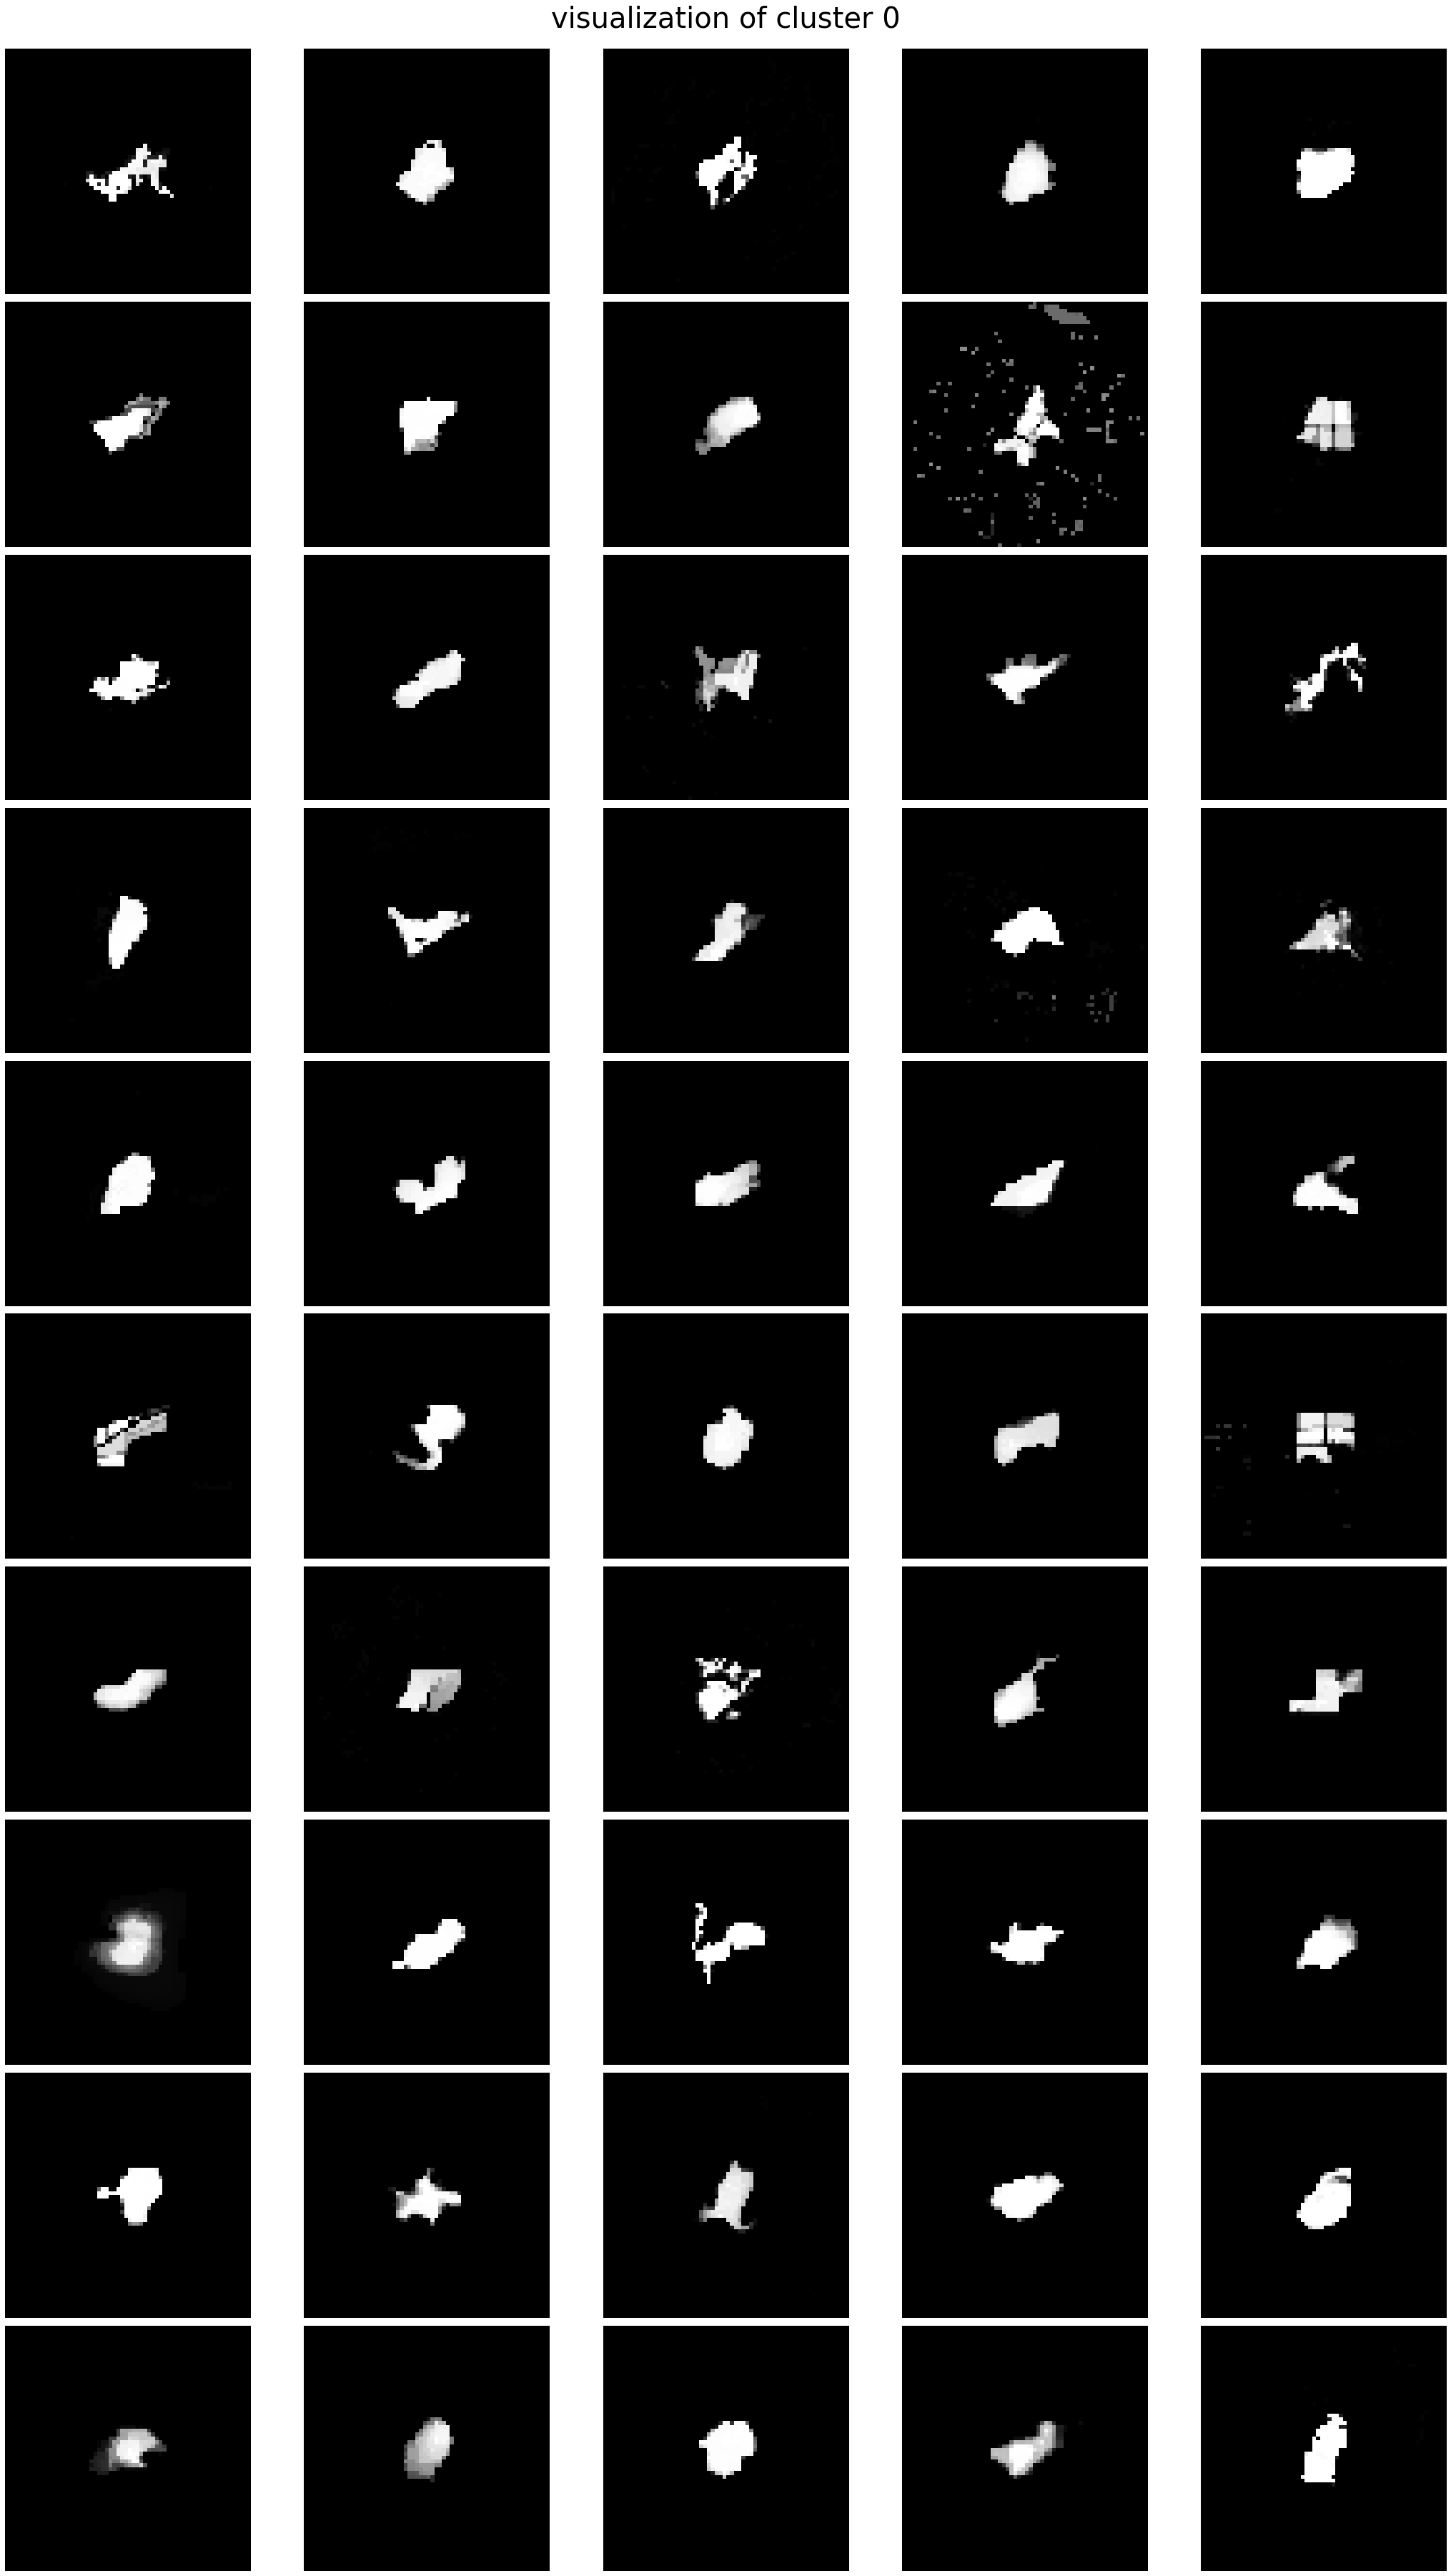

In [75]:
# visualization of each cluster

rows = 10
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(30,50))
fig.suptitle("visualization of cluster 0",y=1.0,fontsize=40,ha='center')
ax = axes.ravel()
for i in range(0, 50):
    im = (X_all_train[cluster0_ids[i]]).reshape((64,64))
    ax[i].imshow(im)

for a in ax:
        a.set_axis_off()

plt.tight_layout()
plt.show() 


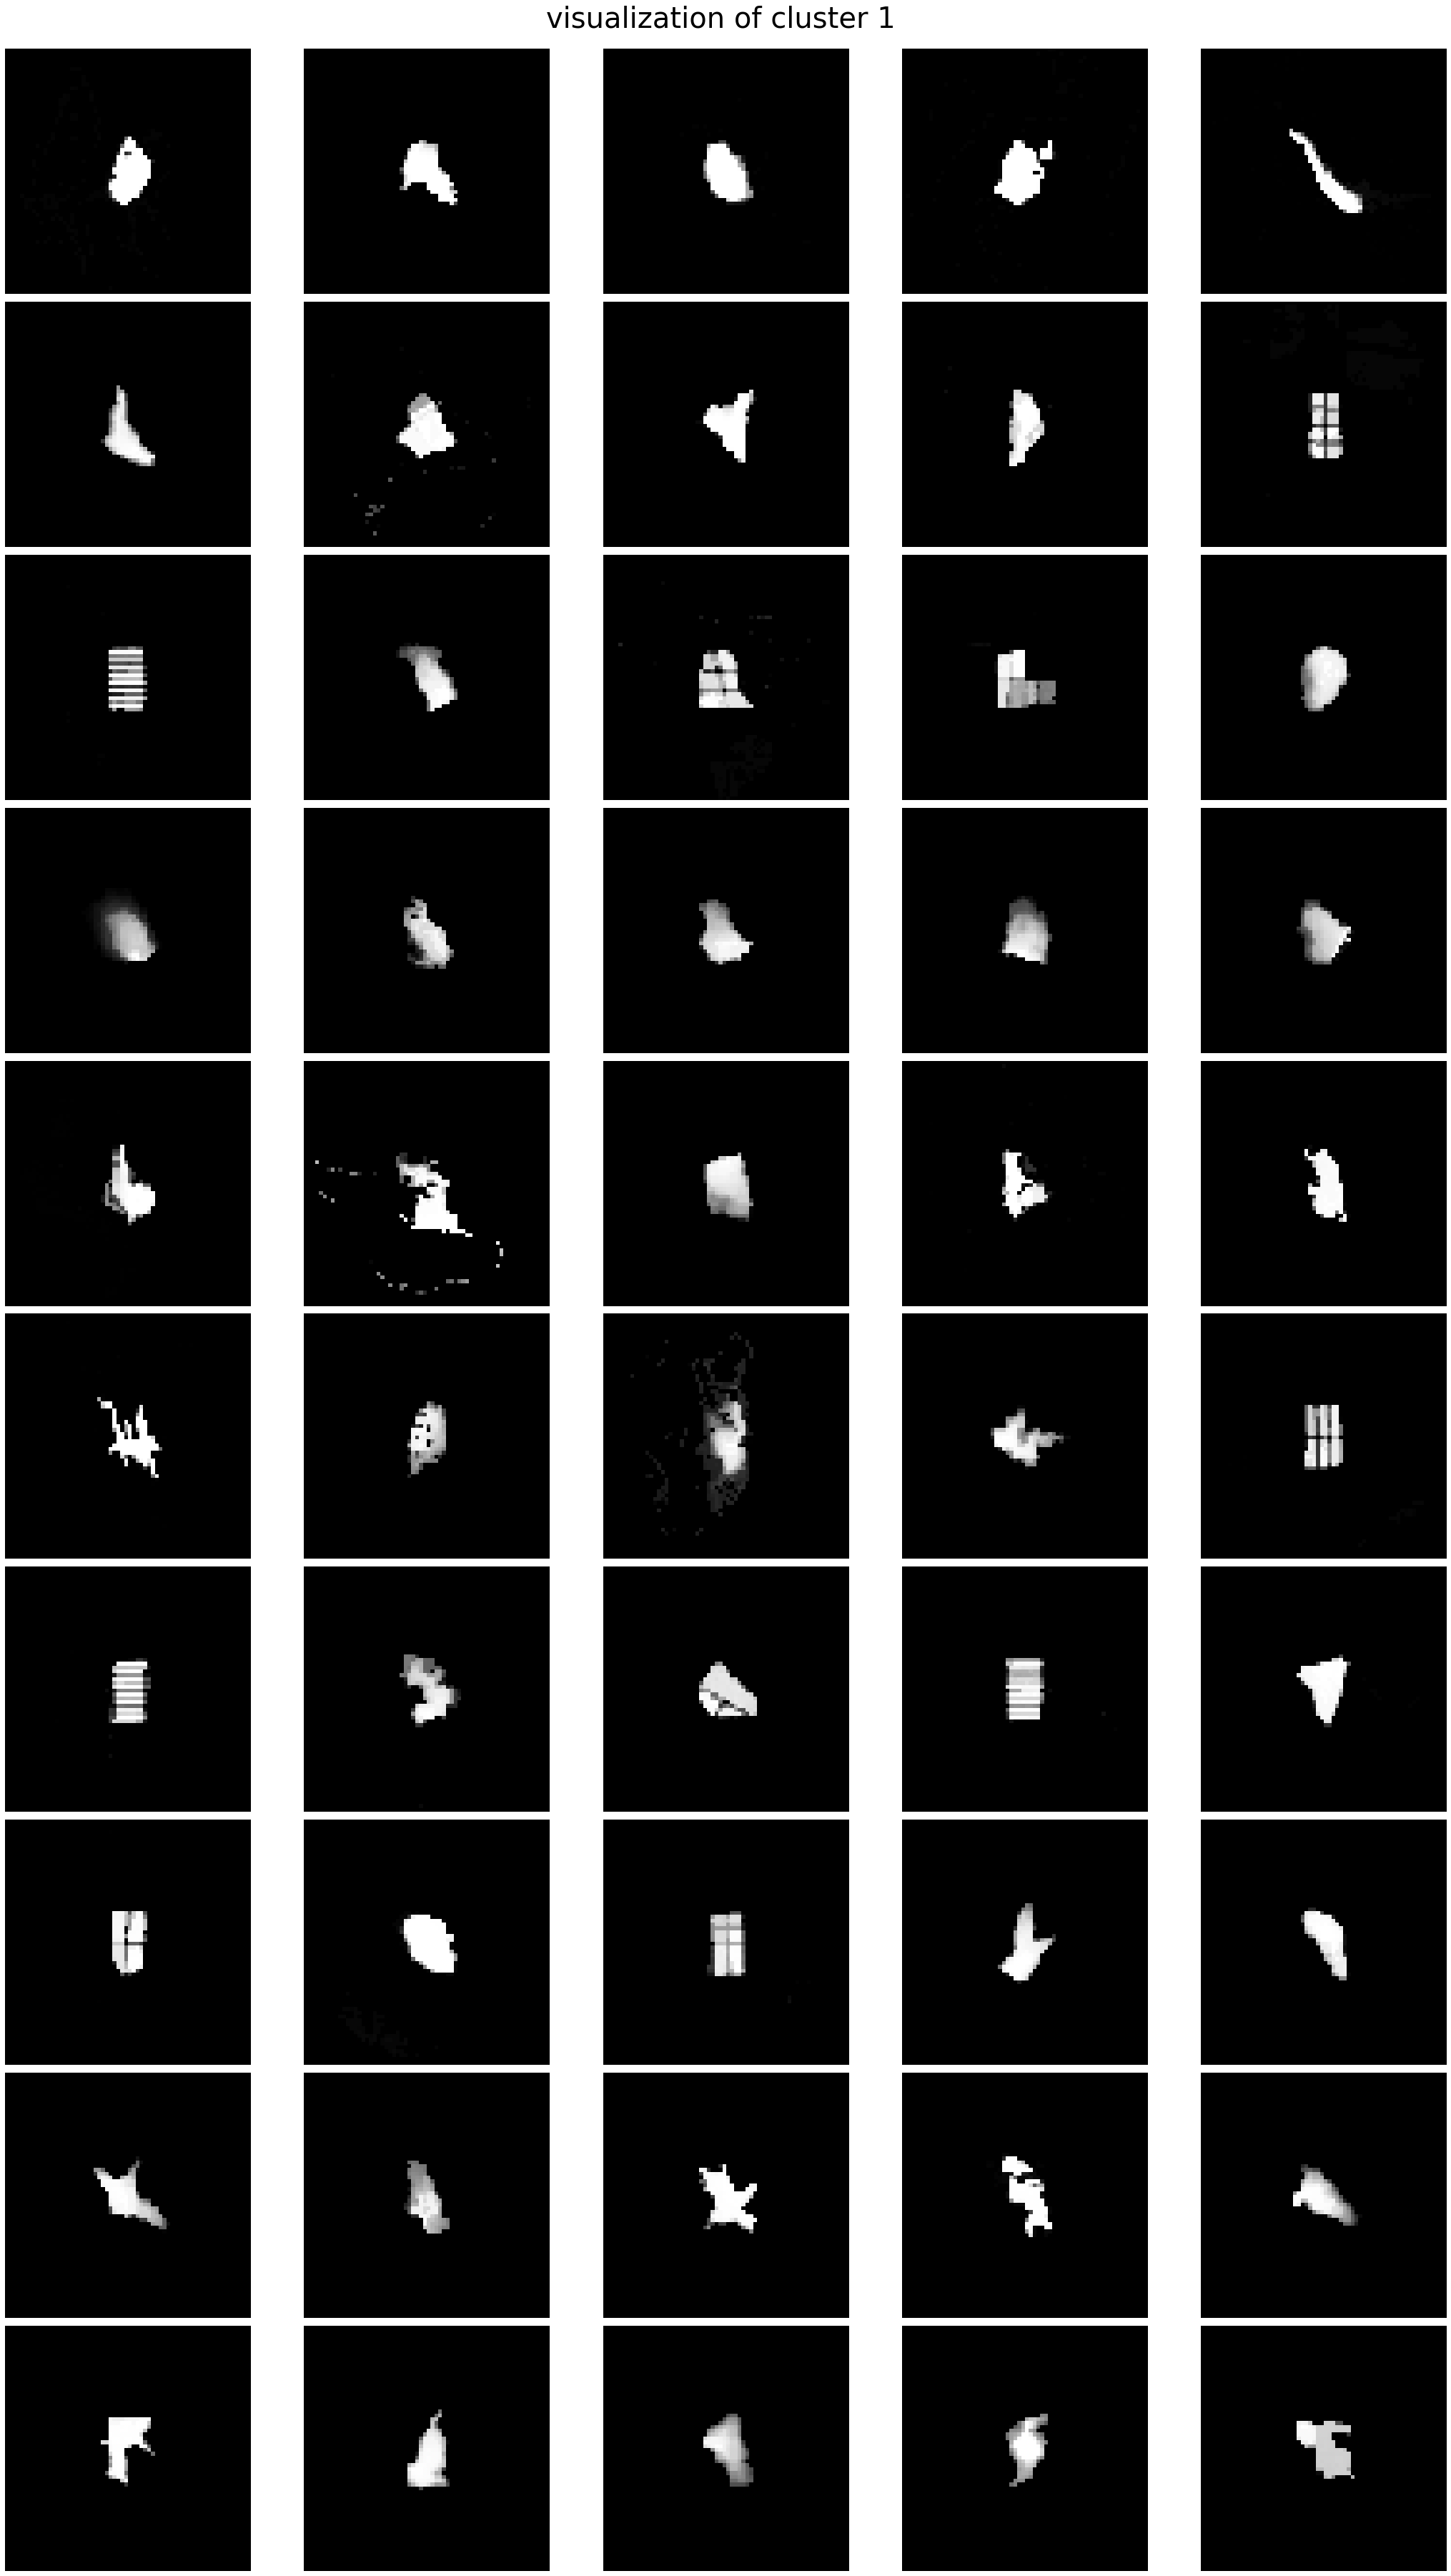

In [74]:
rows = 10
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(30,50))
fig.suptitle("visualization of cluster 1 ",y=1.0,fontsize=40,ha='center')
ax = axes.ravel()
for i in range(0, 50):
    im = (X_all_train[cluster1_ids[i]]).reshape((64,64))
    ax[i].imshow(im)

for a in ax:
        a.set_axis_off()

plt.tight_layout()
plt.show() 


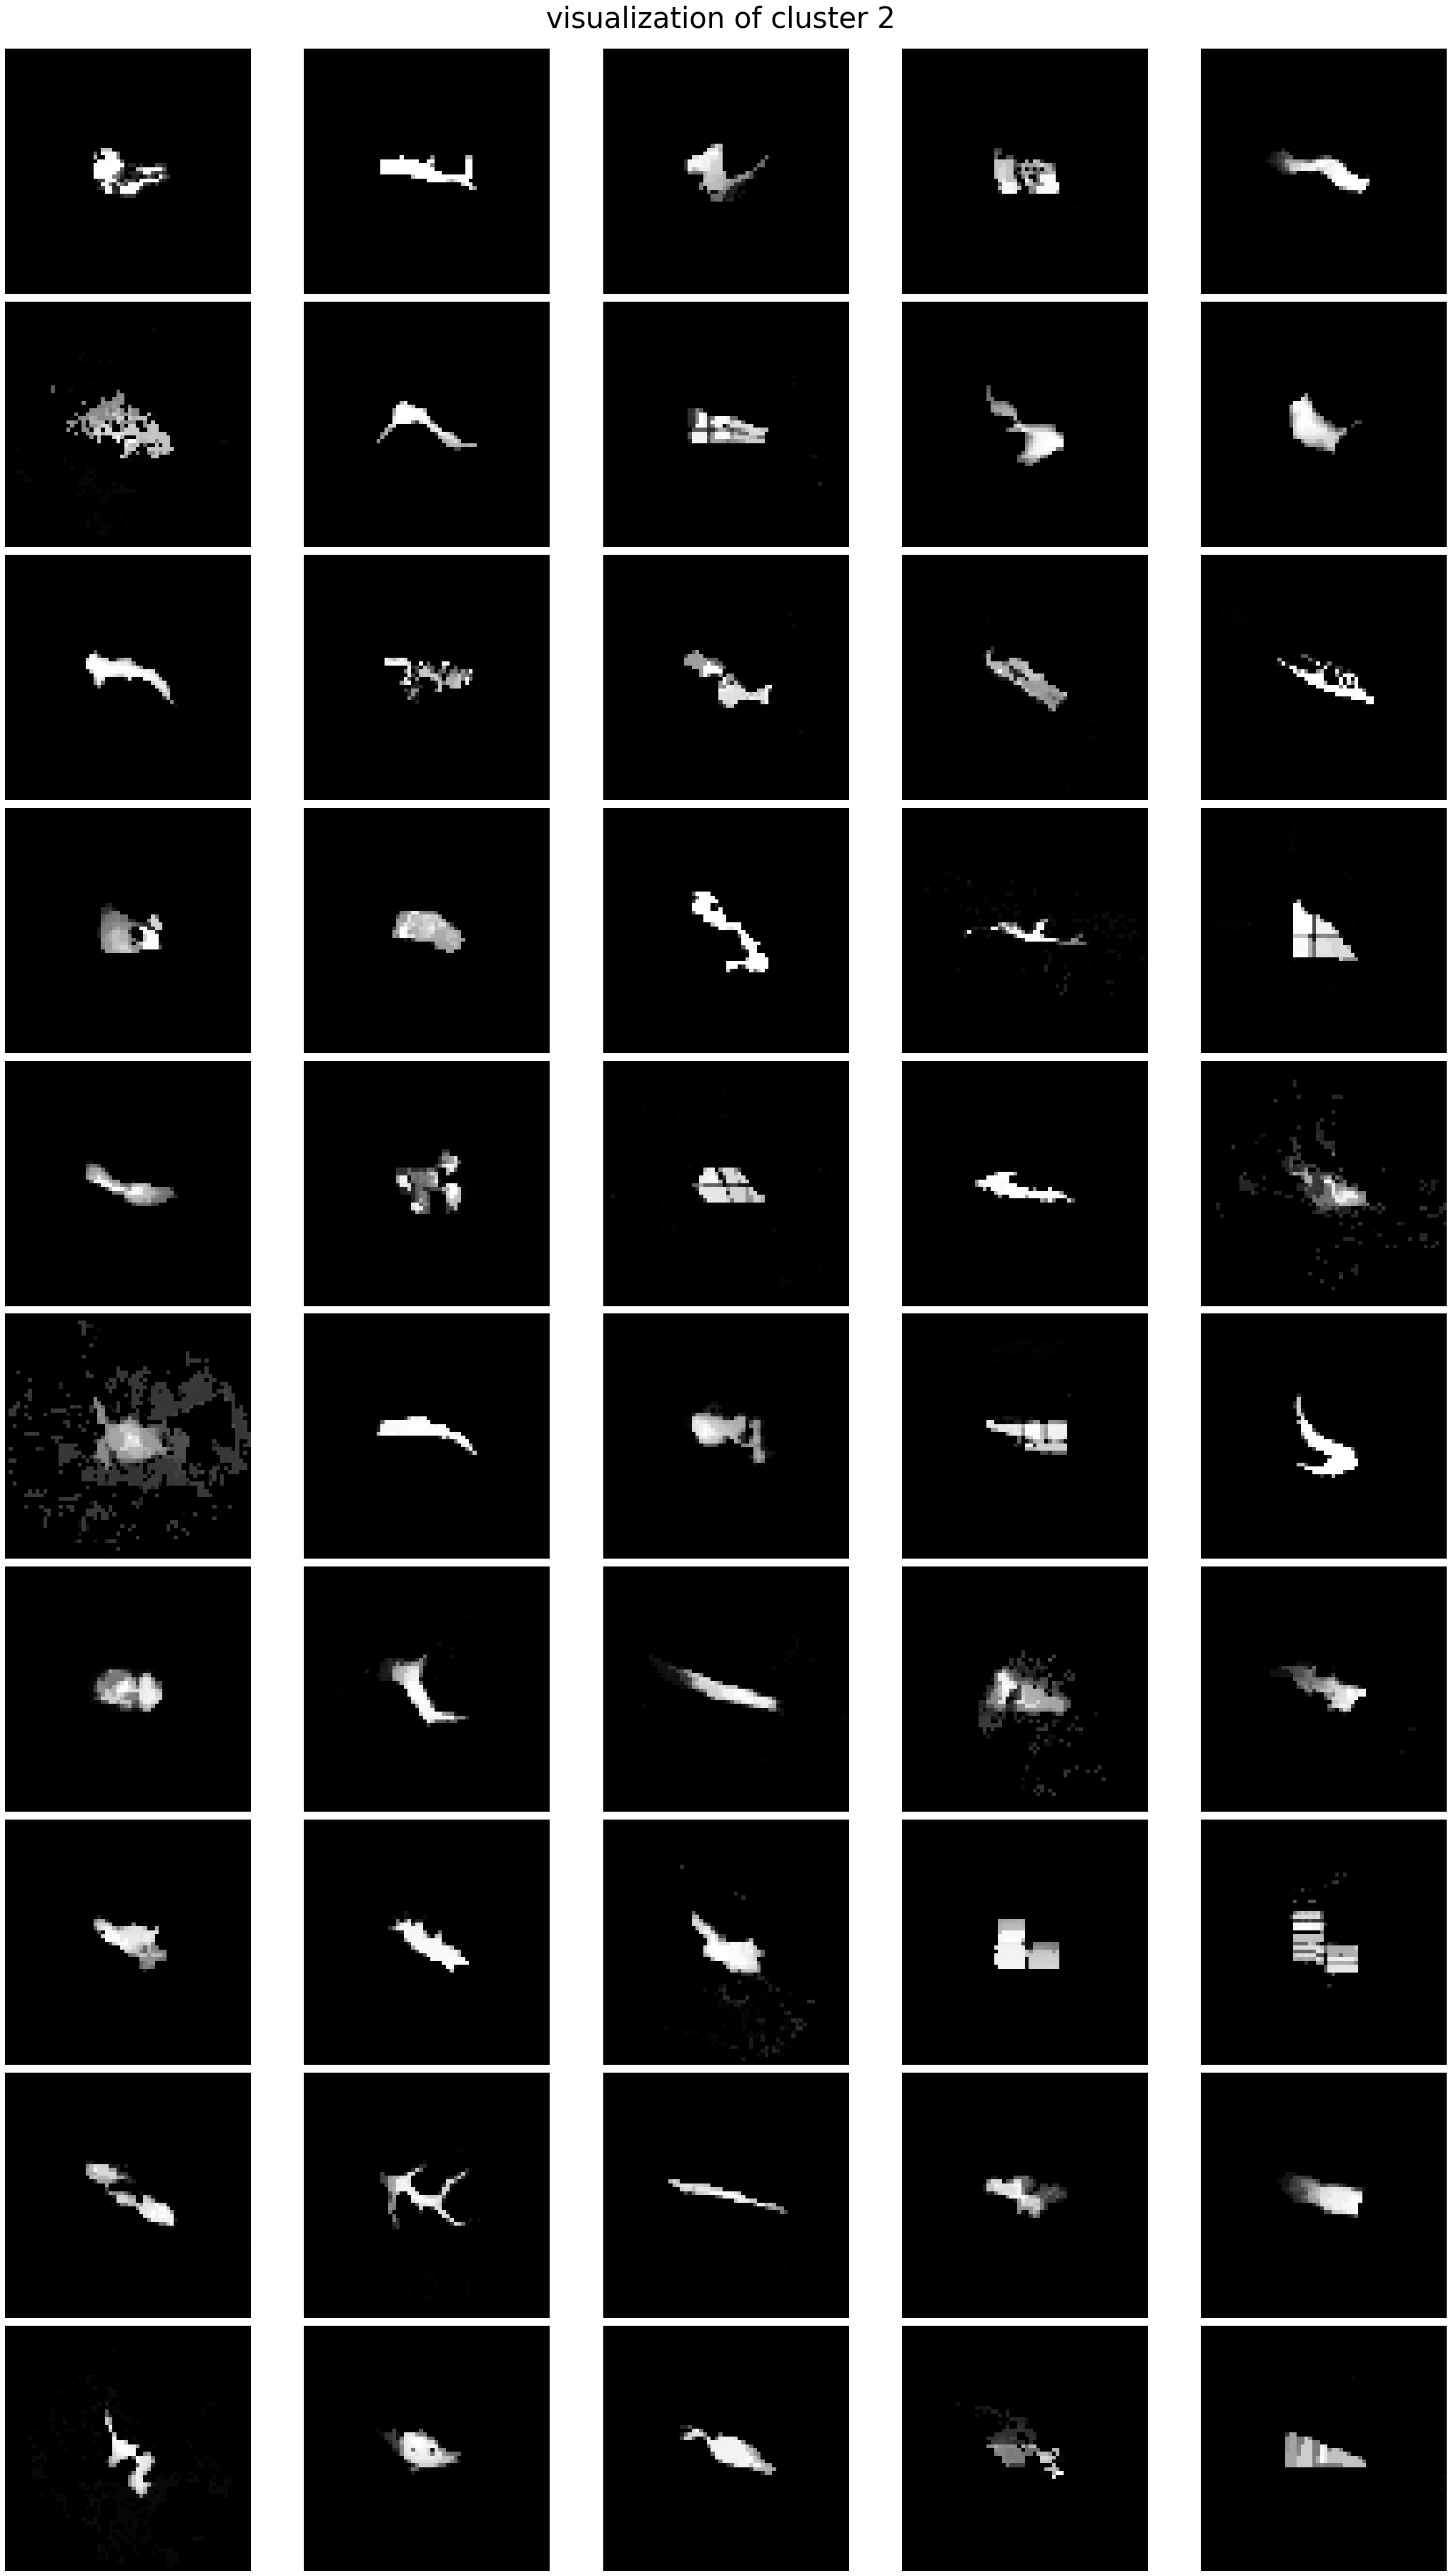

In [76]:
rows = 10
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(30,50))
fig.suptitle("visualization of cluster 2 ",y=1.0,fontsize=40,ha='center')
ax = axes.ravel()
for i in range(0, 50):
    im = (X_all_train[cluster2_ids[i]]).reshape((64,64))
    ax[i].imshow(im)

for a in ax:
        a.set_axis_off()

plt.tight_layout()
plt.show() 


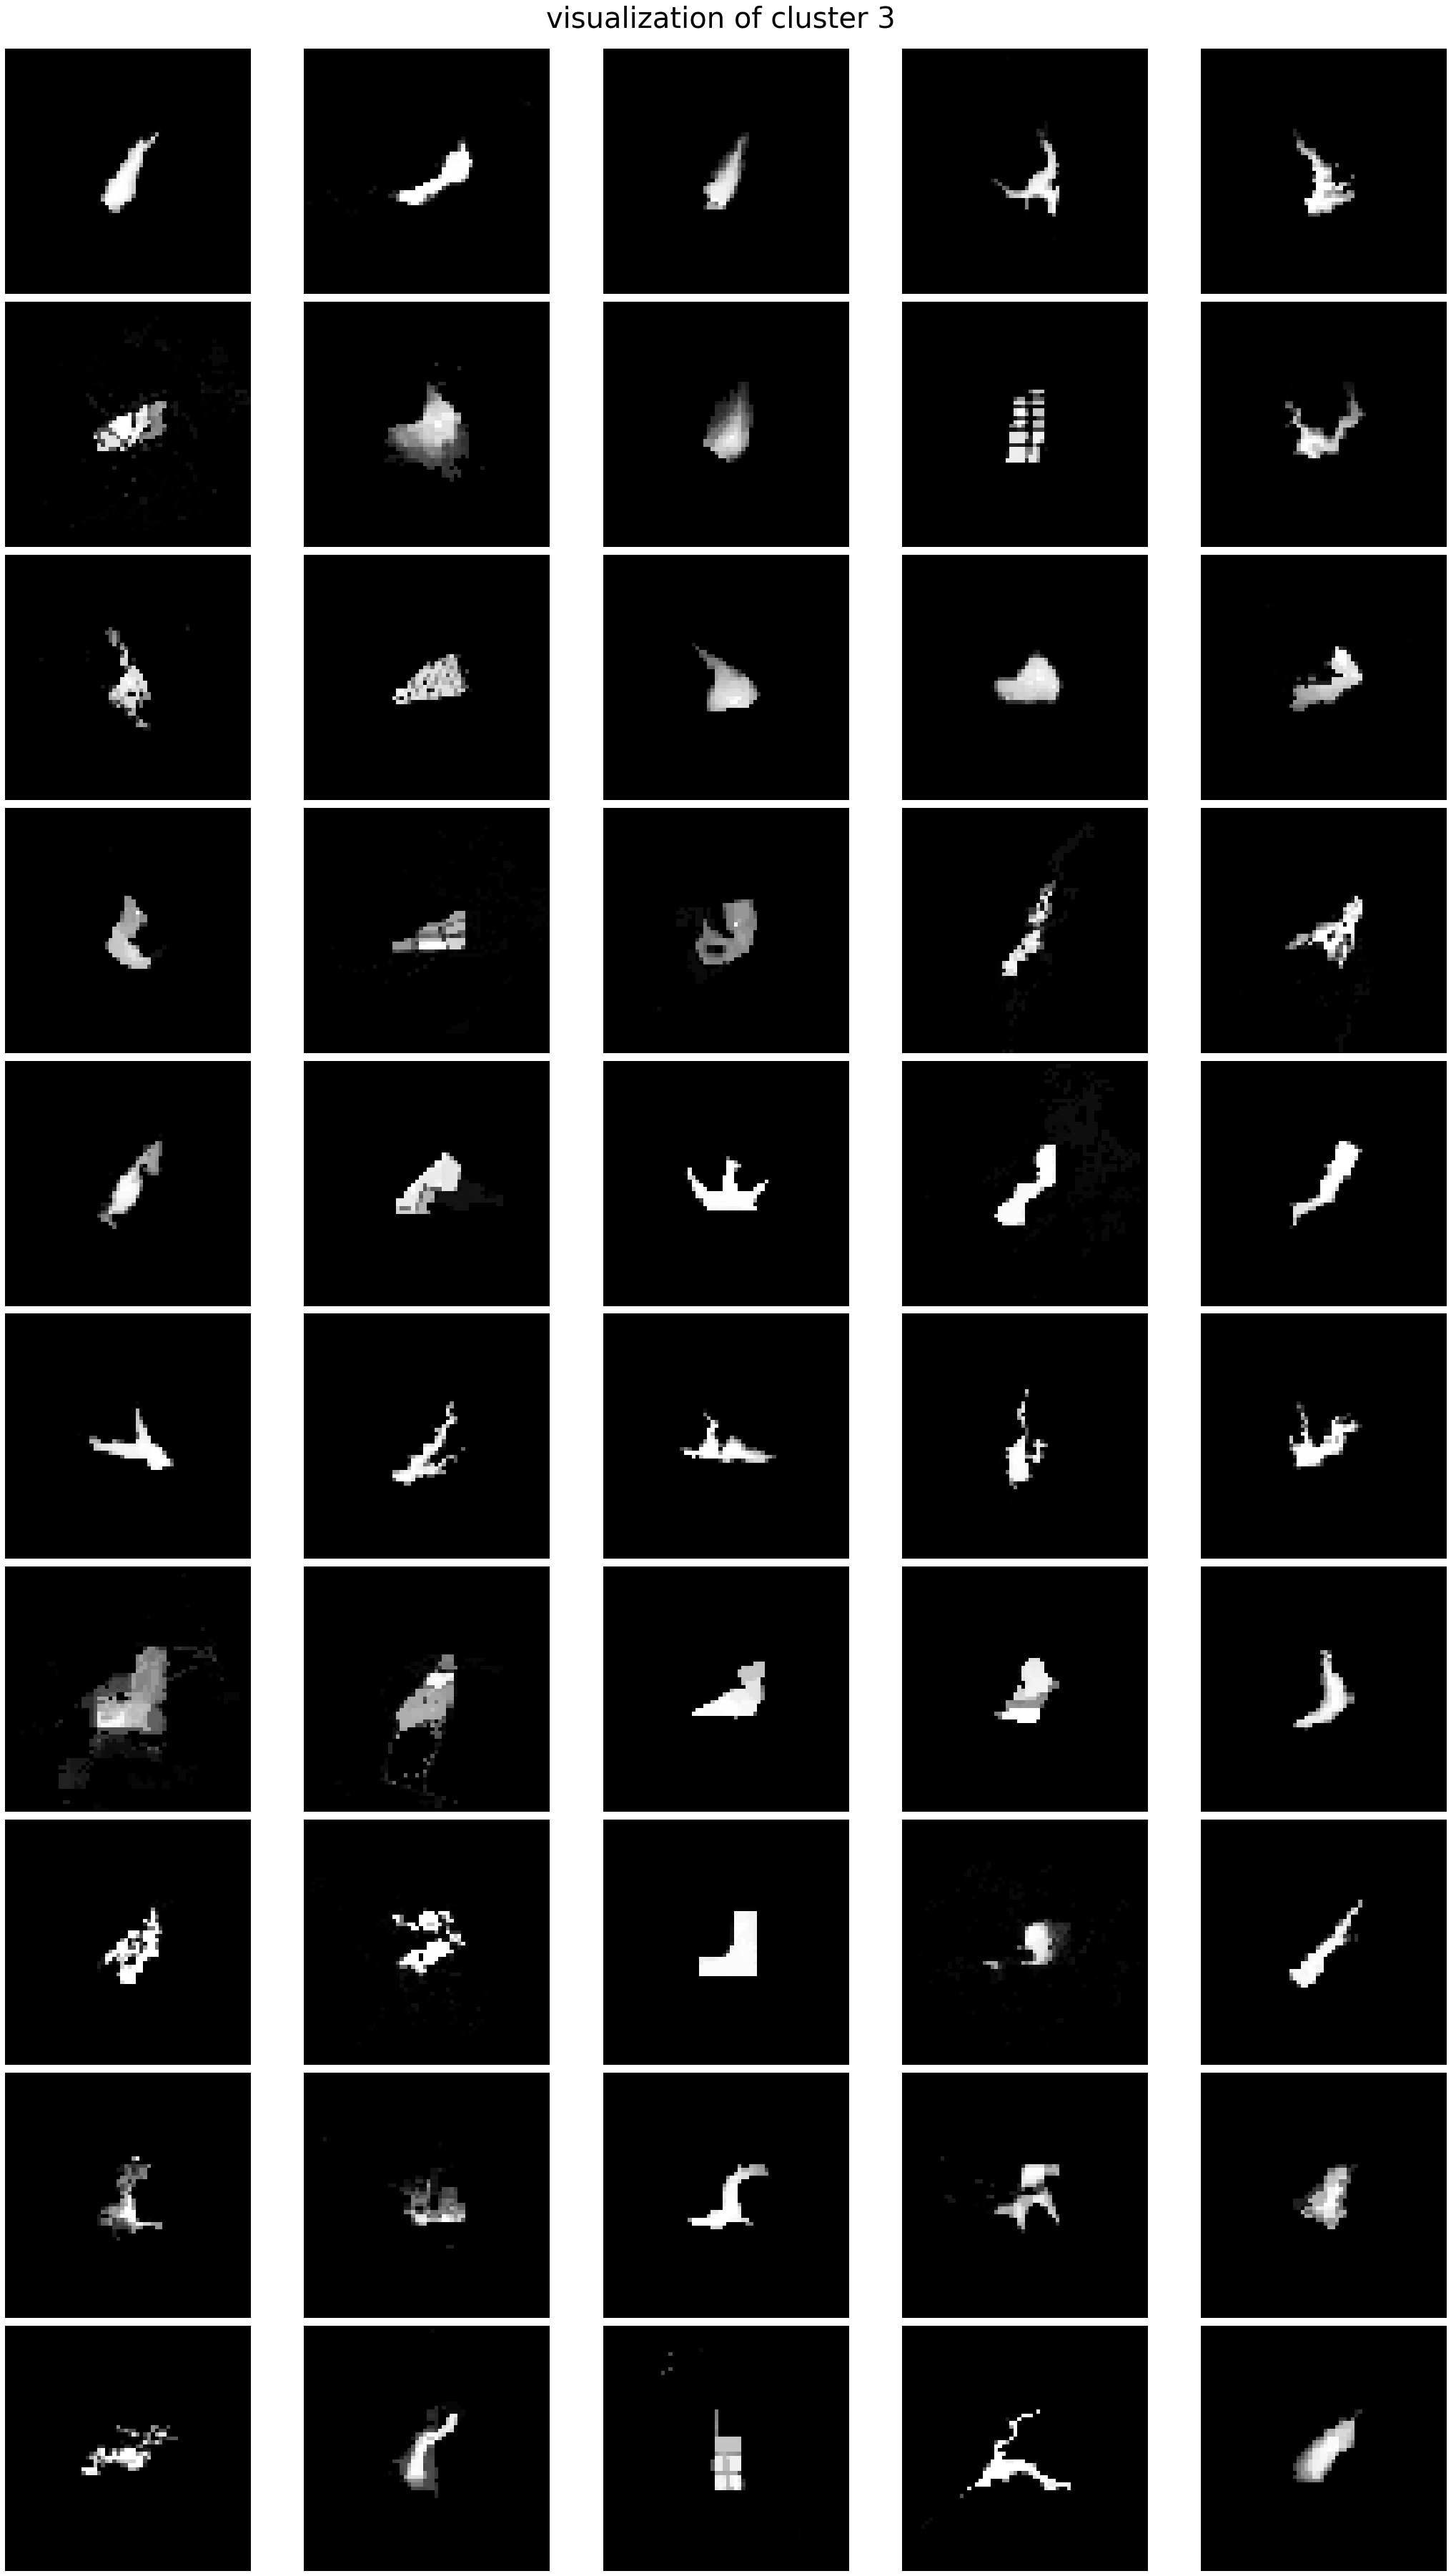

In [77]:
rows = 10
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(30,50))
fig.suptitle("visualization of cluster 3 ",y=1.0,fontsize=40,ha='center')
ax = axes.ravel()
for i in range(0, 50):
    im = (X_all_train[cluster3_ids[i]]).reshape((64,64))
    ax[i].imshow(im)

for a in ax:
        a.set_axis_off()

plt.tight_layout()
plt.show() 



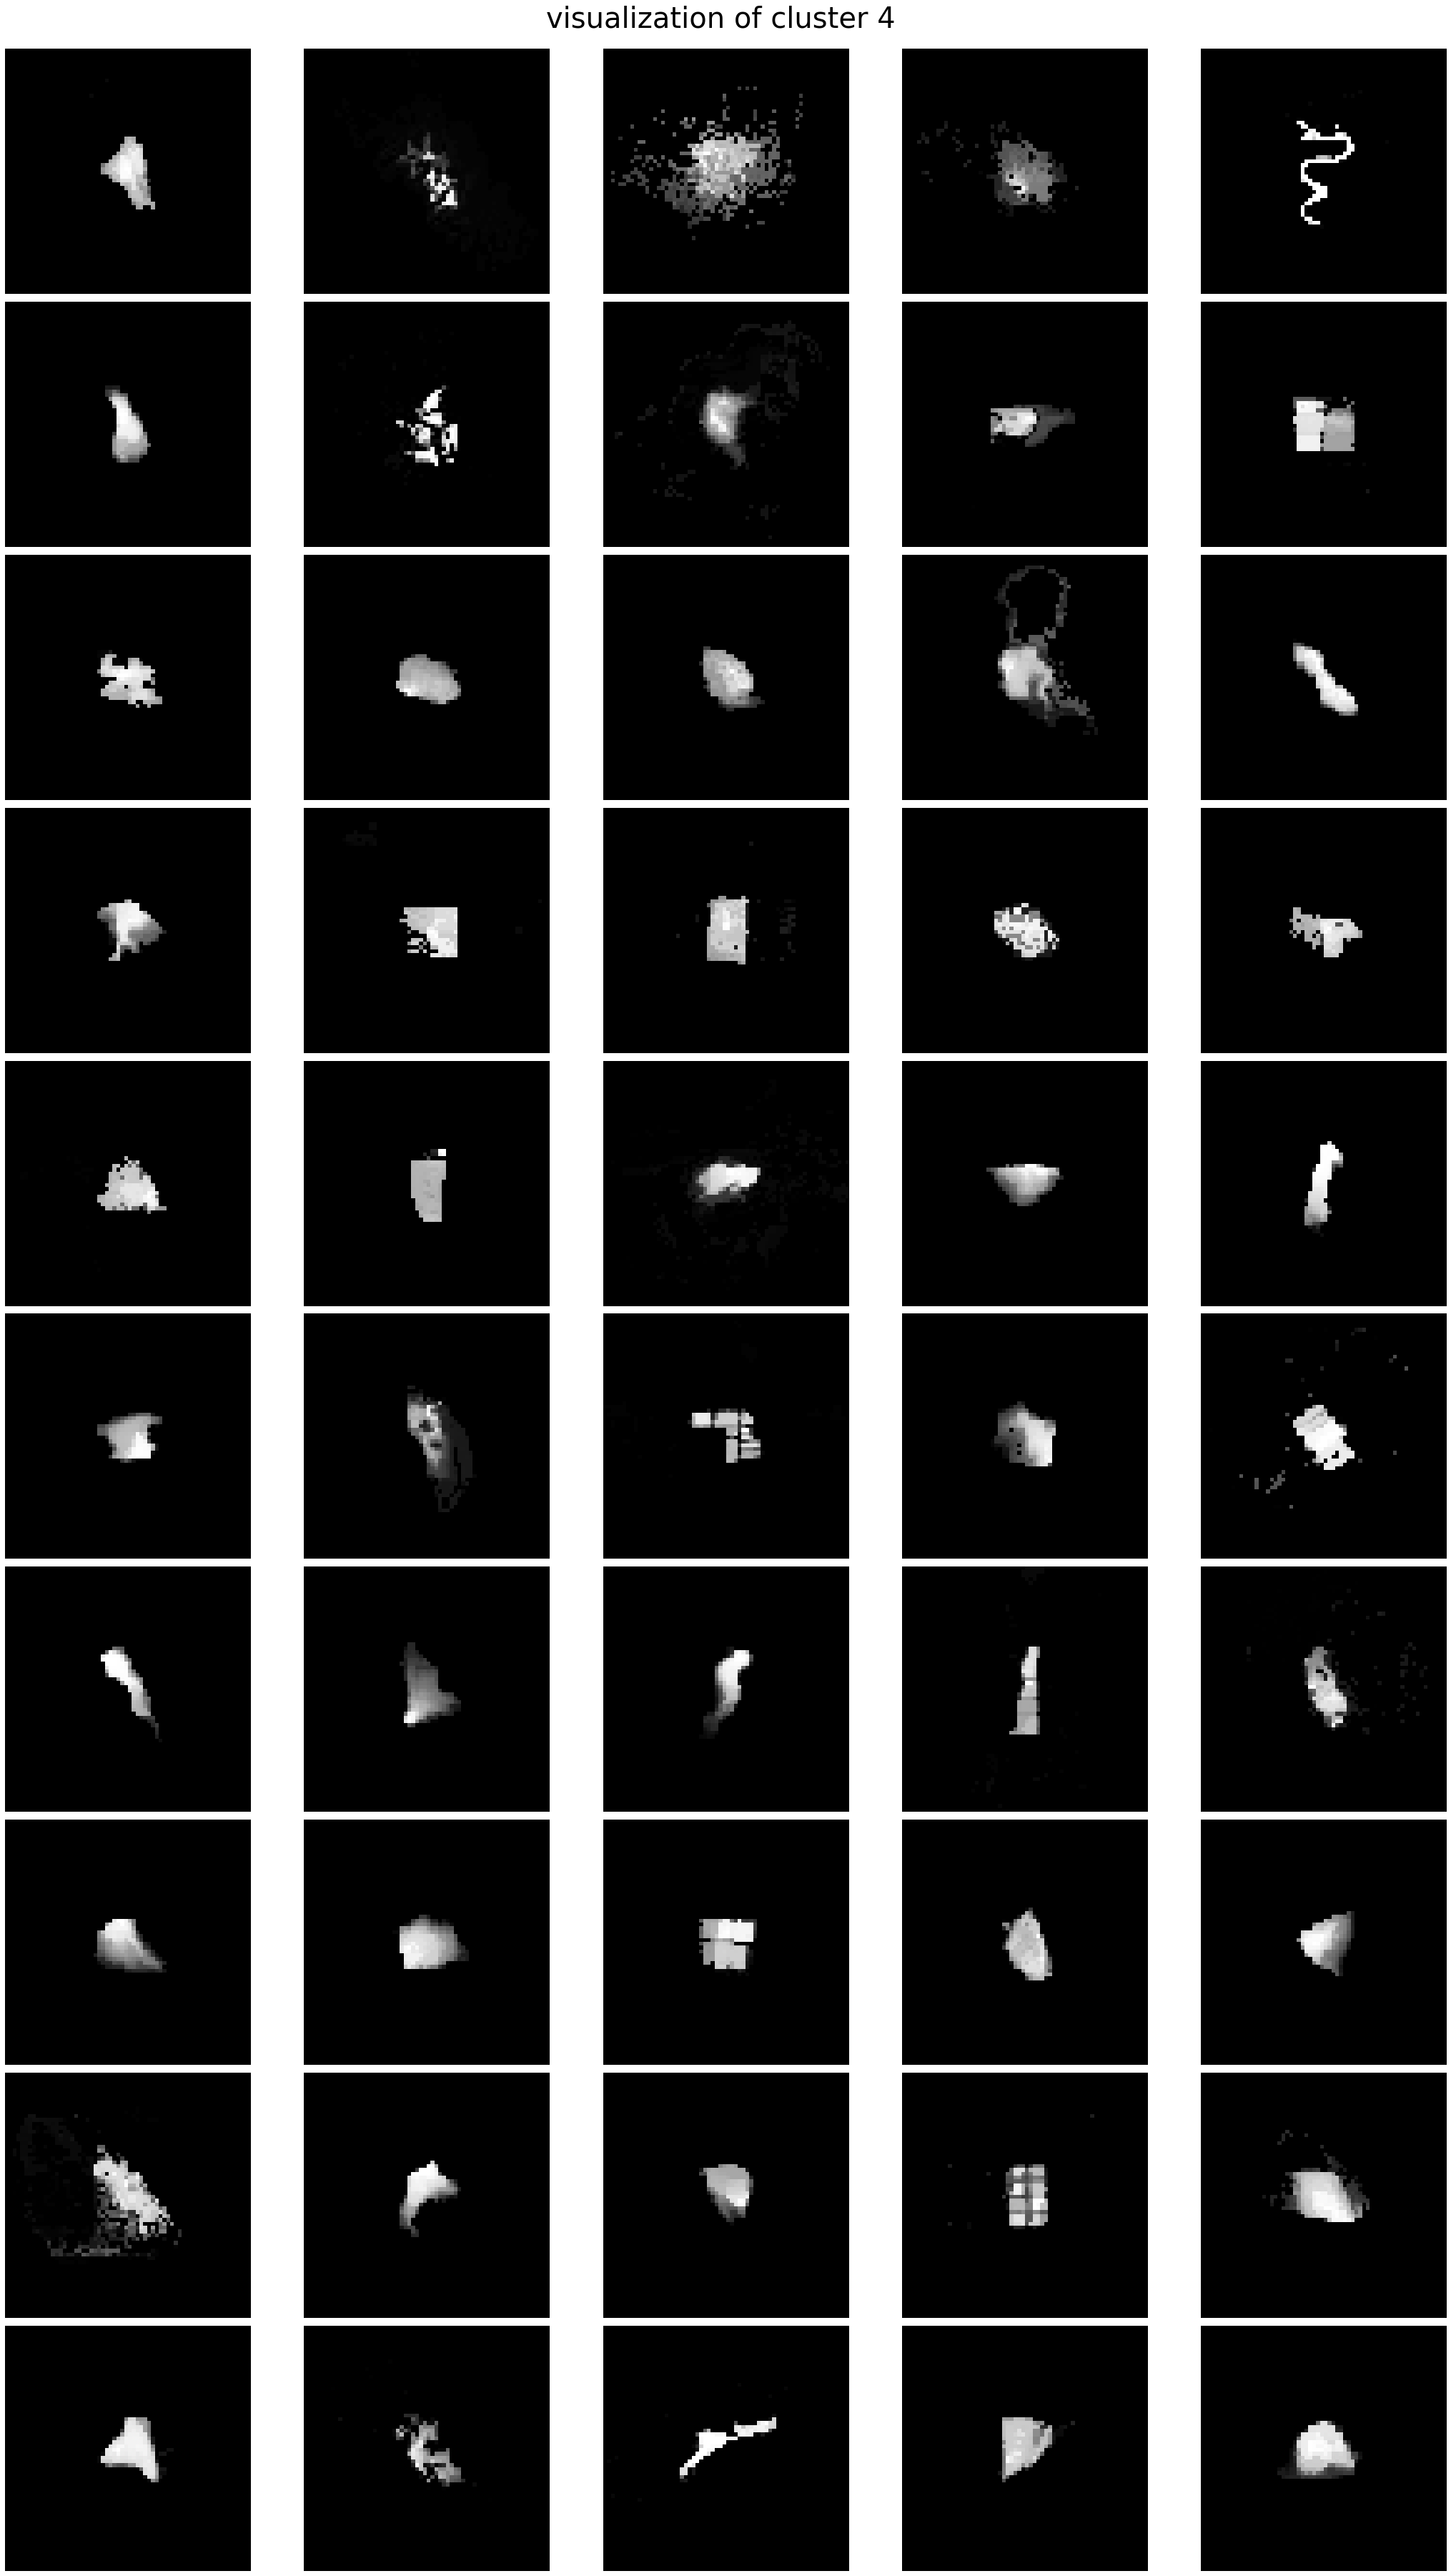

In [78]:
rows = 10
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(30,50))
fig.suptitle("visualization of cluster 4 ",y=1.0,fontsize=40,ha='center')
ax = axes.ravel()
for i in range(0, 50):
    im = (X_all_train[cluster4_ids[i]]).reshape((64,64))
    ax[i].imshow(im)

for a in ax:
        a.set_axis_off()

plt.tight_layout()
plt.show() 


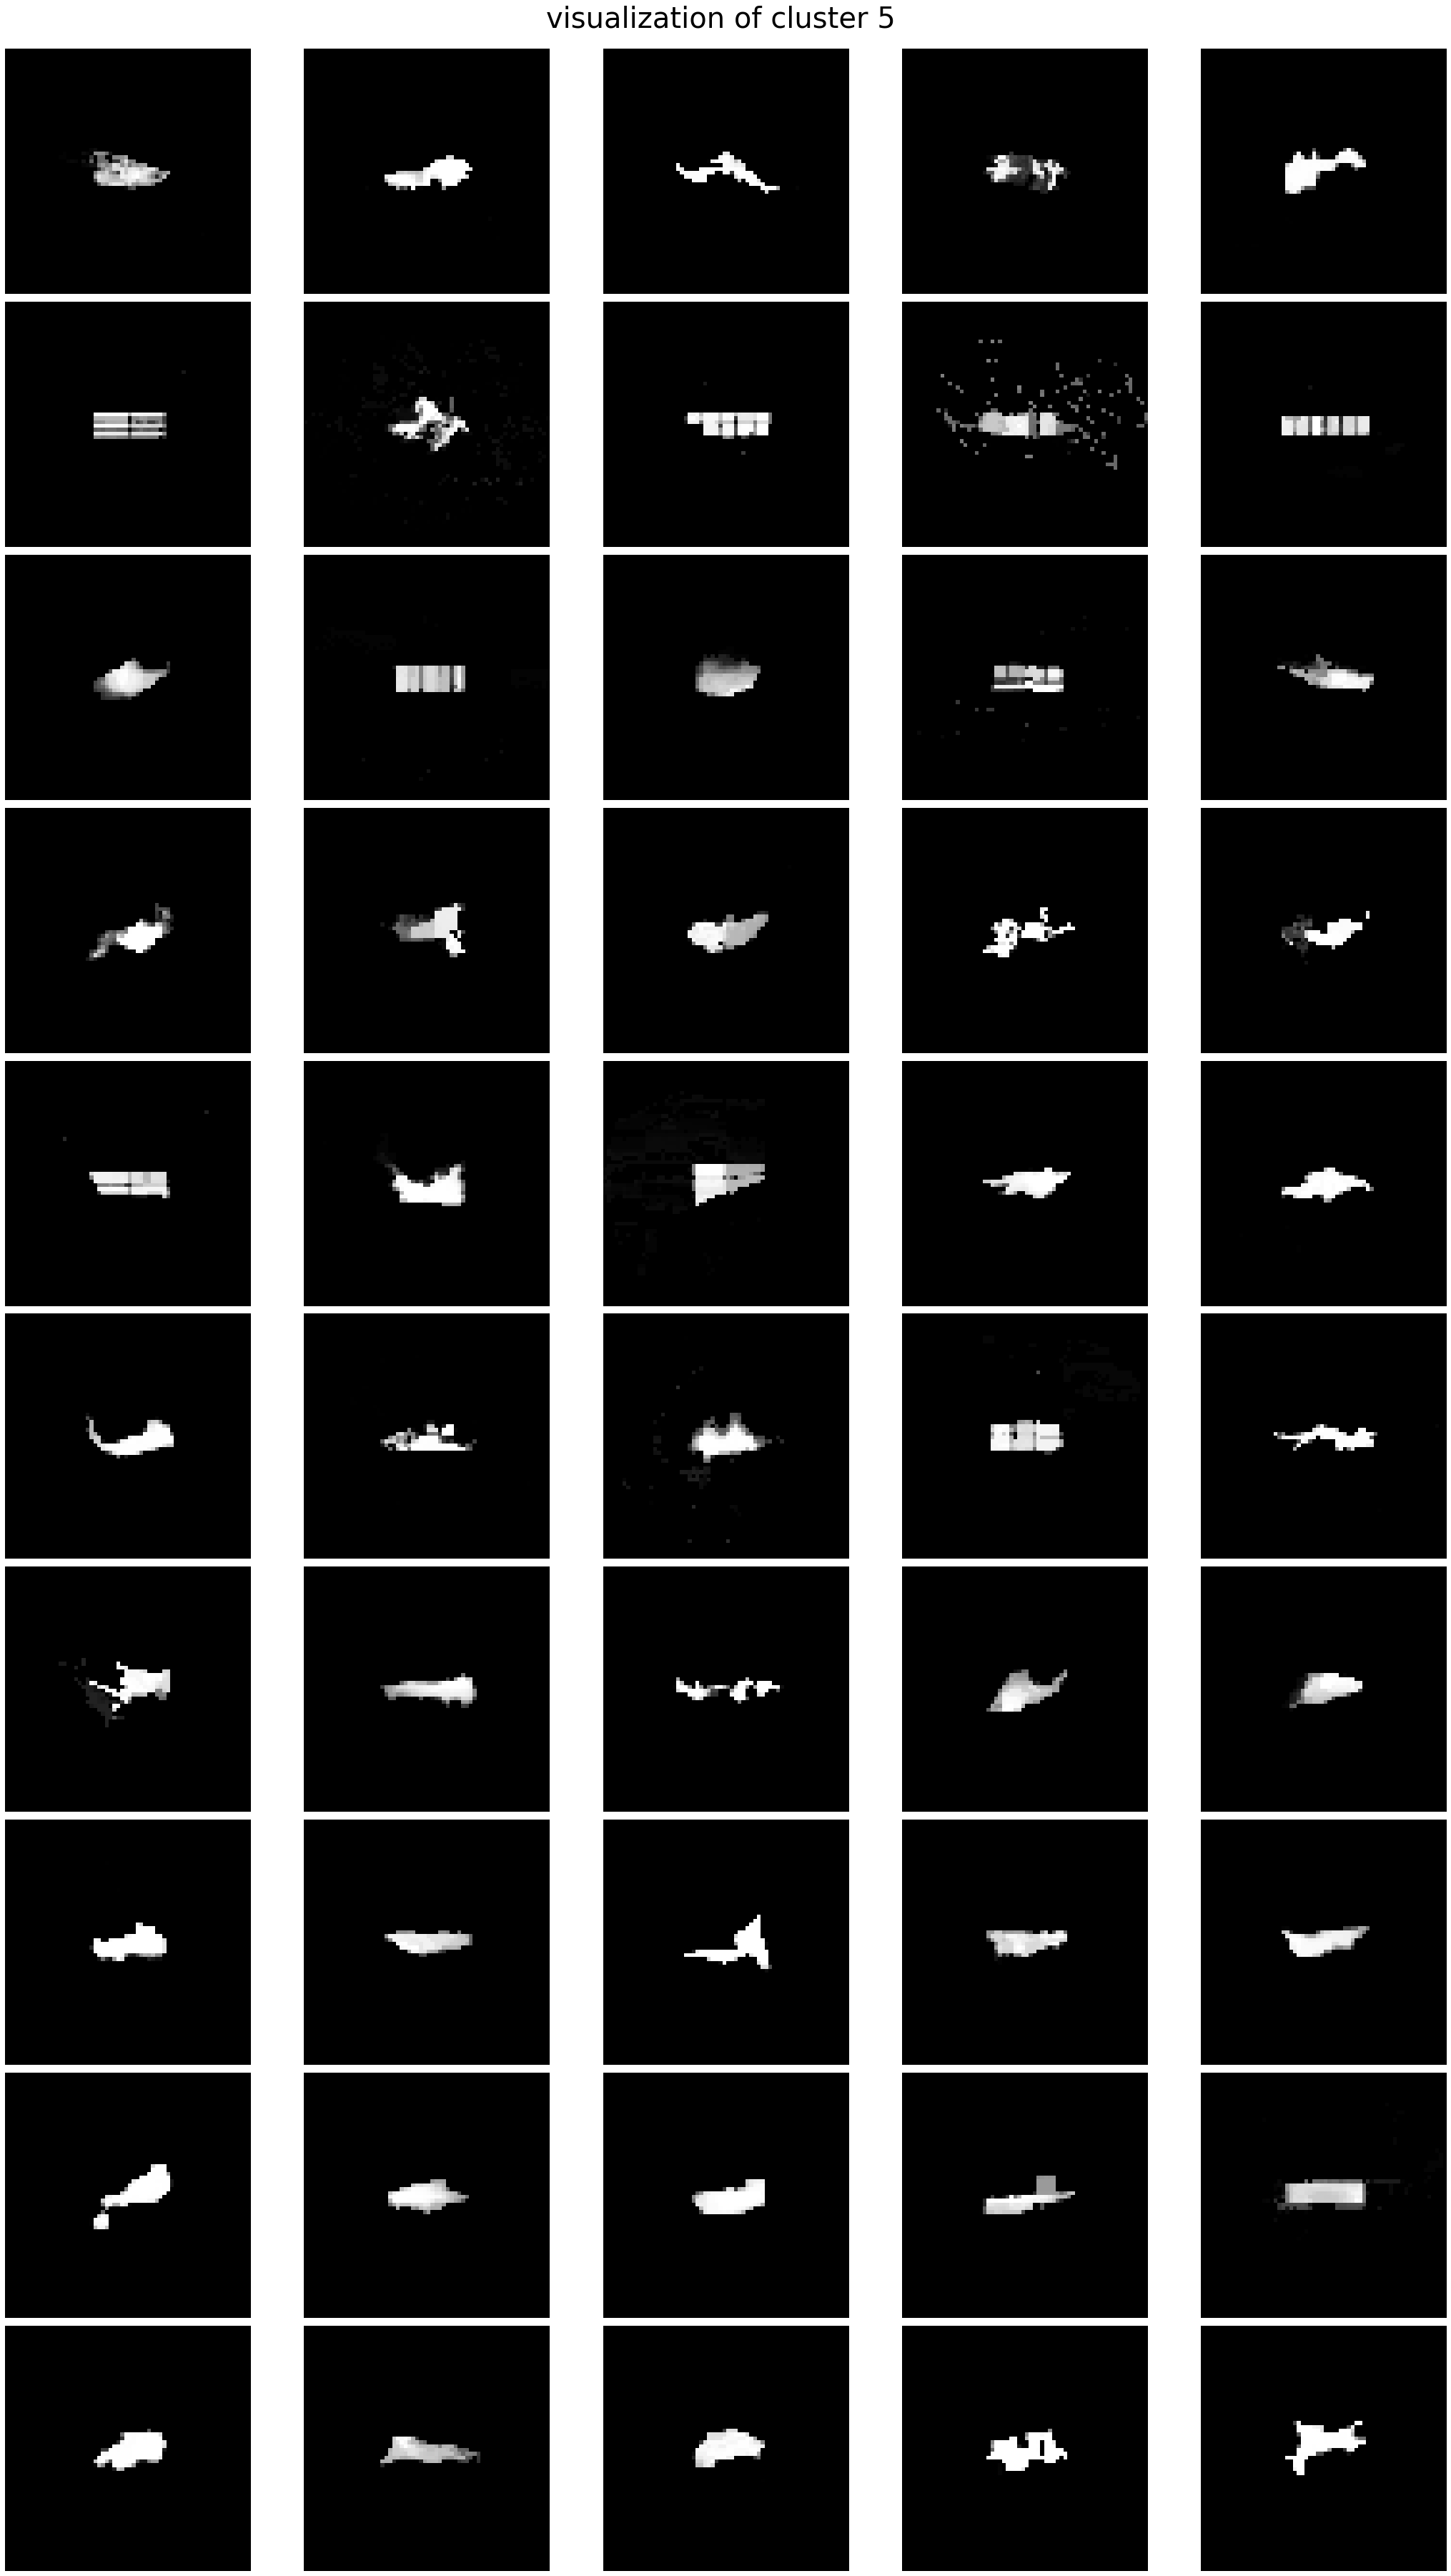

In [81]:
rows = 10
cols = 5


fig, axes = plt.subplots(rows, cols, figsize=(30,50))
fig.suptitle("visualization of cluster 5 ",y=1.0,fontsize=40,ha='center')
ax = axes.ravel()
for i in range(0, 50):
    im = (X_all_train[cluster5_ids[i]]).reshape((64,64))
    ax[i].imshow(im)

for a in ax:
        a.set_axis_off()

plt.tight_layout()
plt.show() 



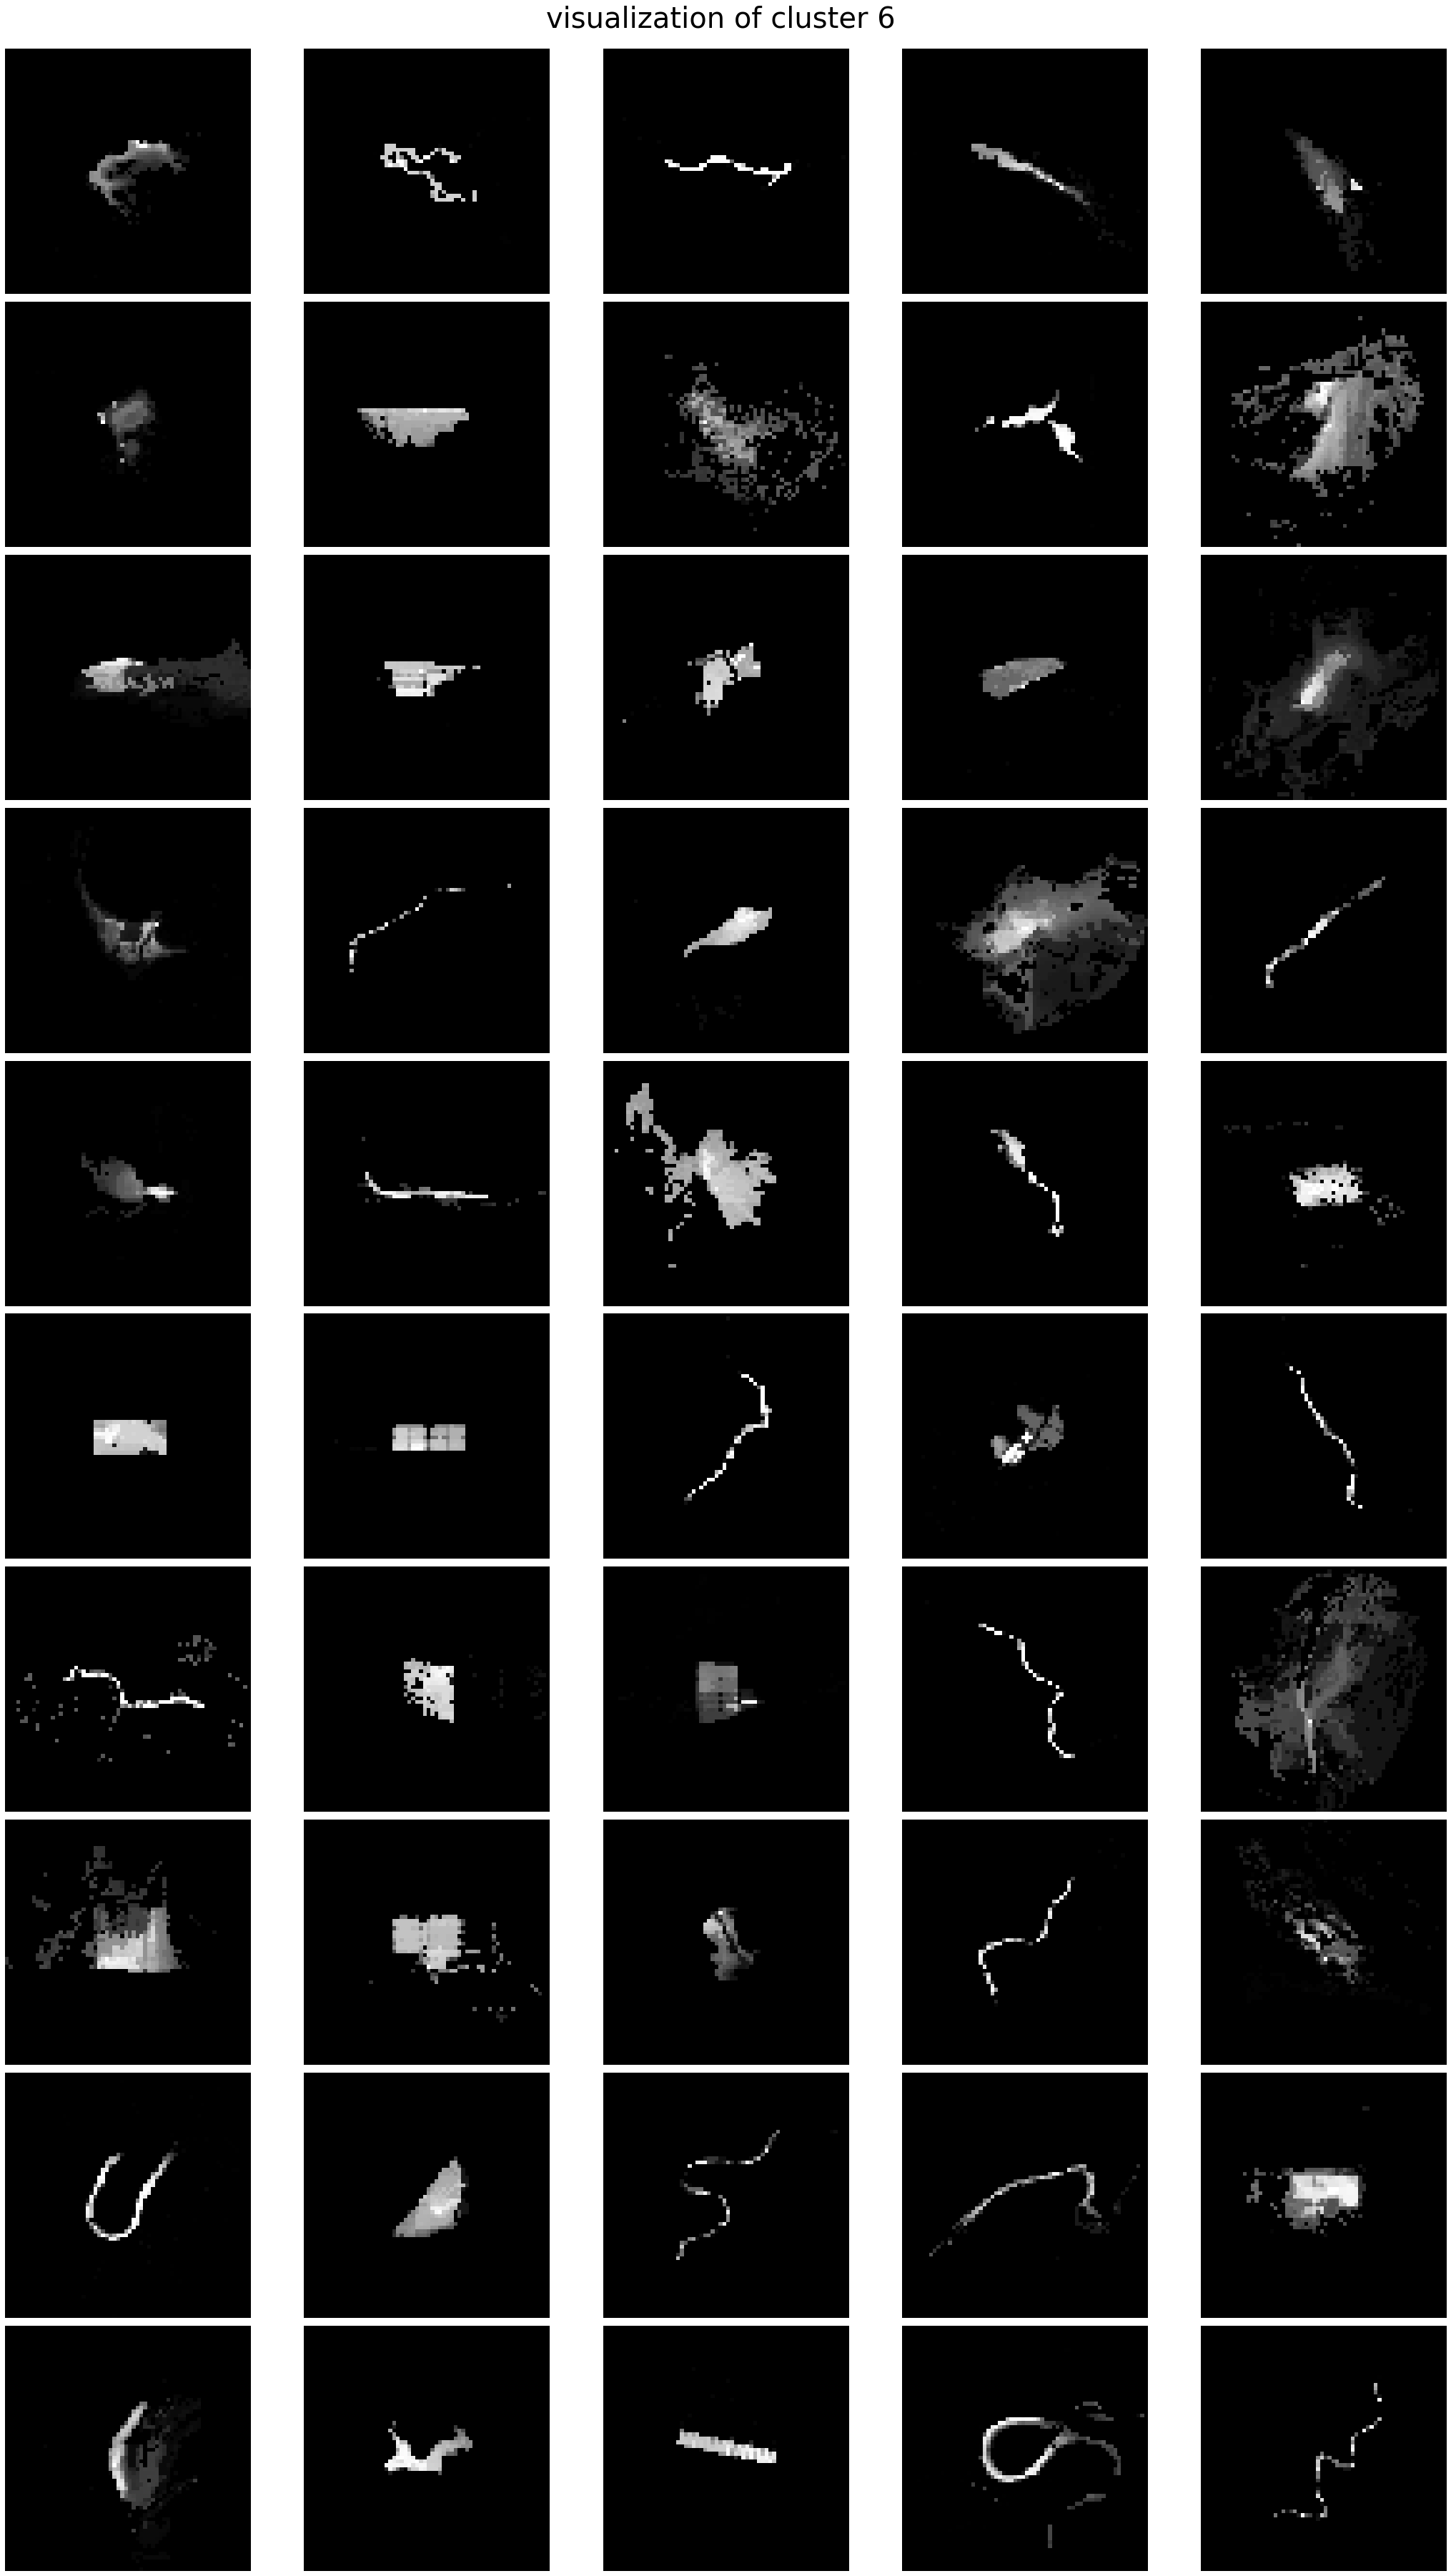

In [79]:
rows = 10
cols = 5


fig, axes = plt.subplots(rows, cols, figsize=(30,50))
fig.suptitle("visualization of cluster 6 ",y=1.0,fontsize=40,ha='center')
ax = axes.ravel()
for i in range(0, 50):
    im = (X_all_train[cluster6_ids[i]]).reshape((64,64))
    ax[i].imshow(im)

for a in ax:
        a.set_axis_off()

plt.tight_layout()
plt.show() 


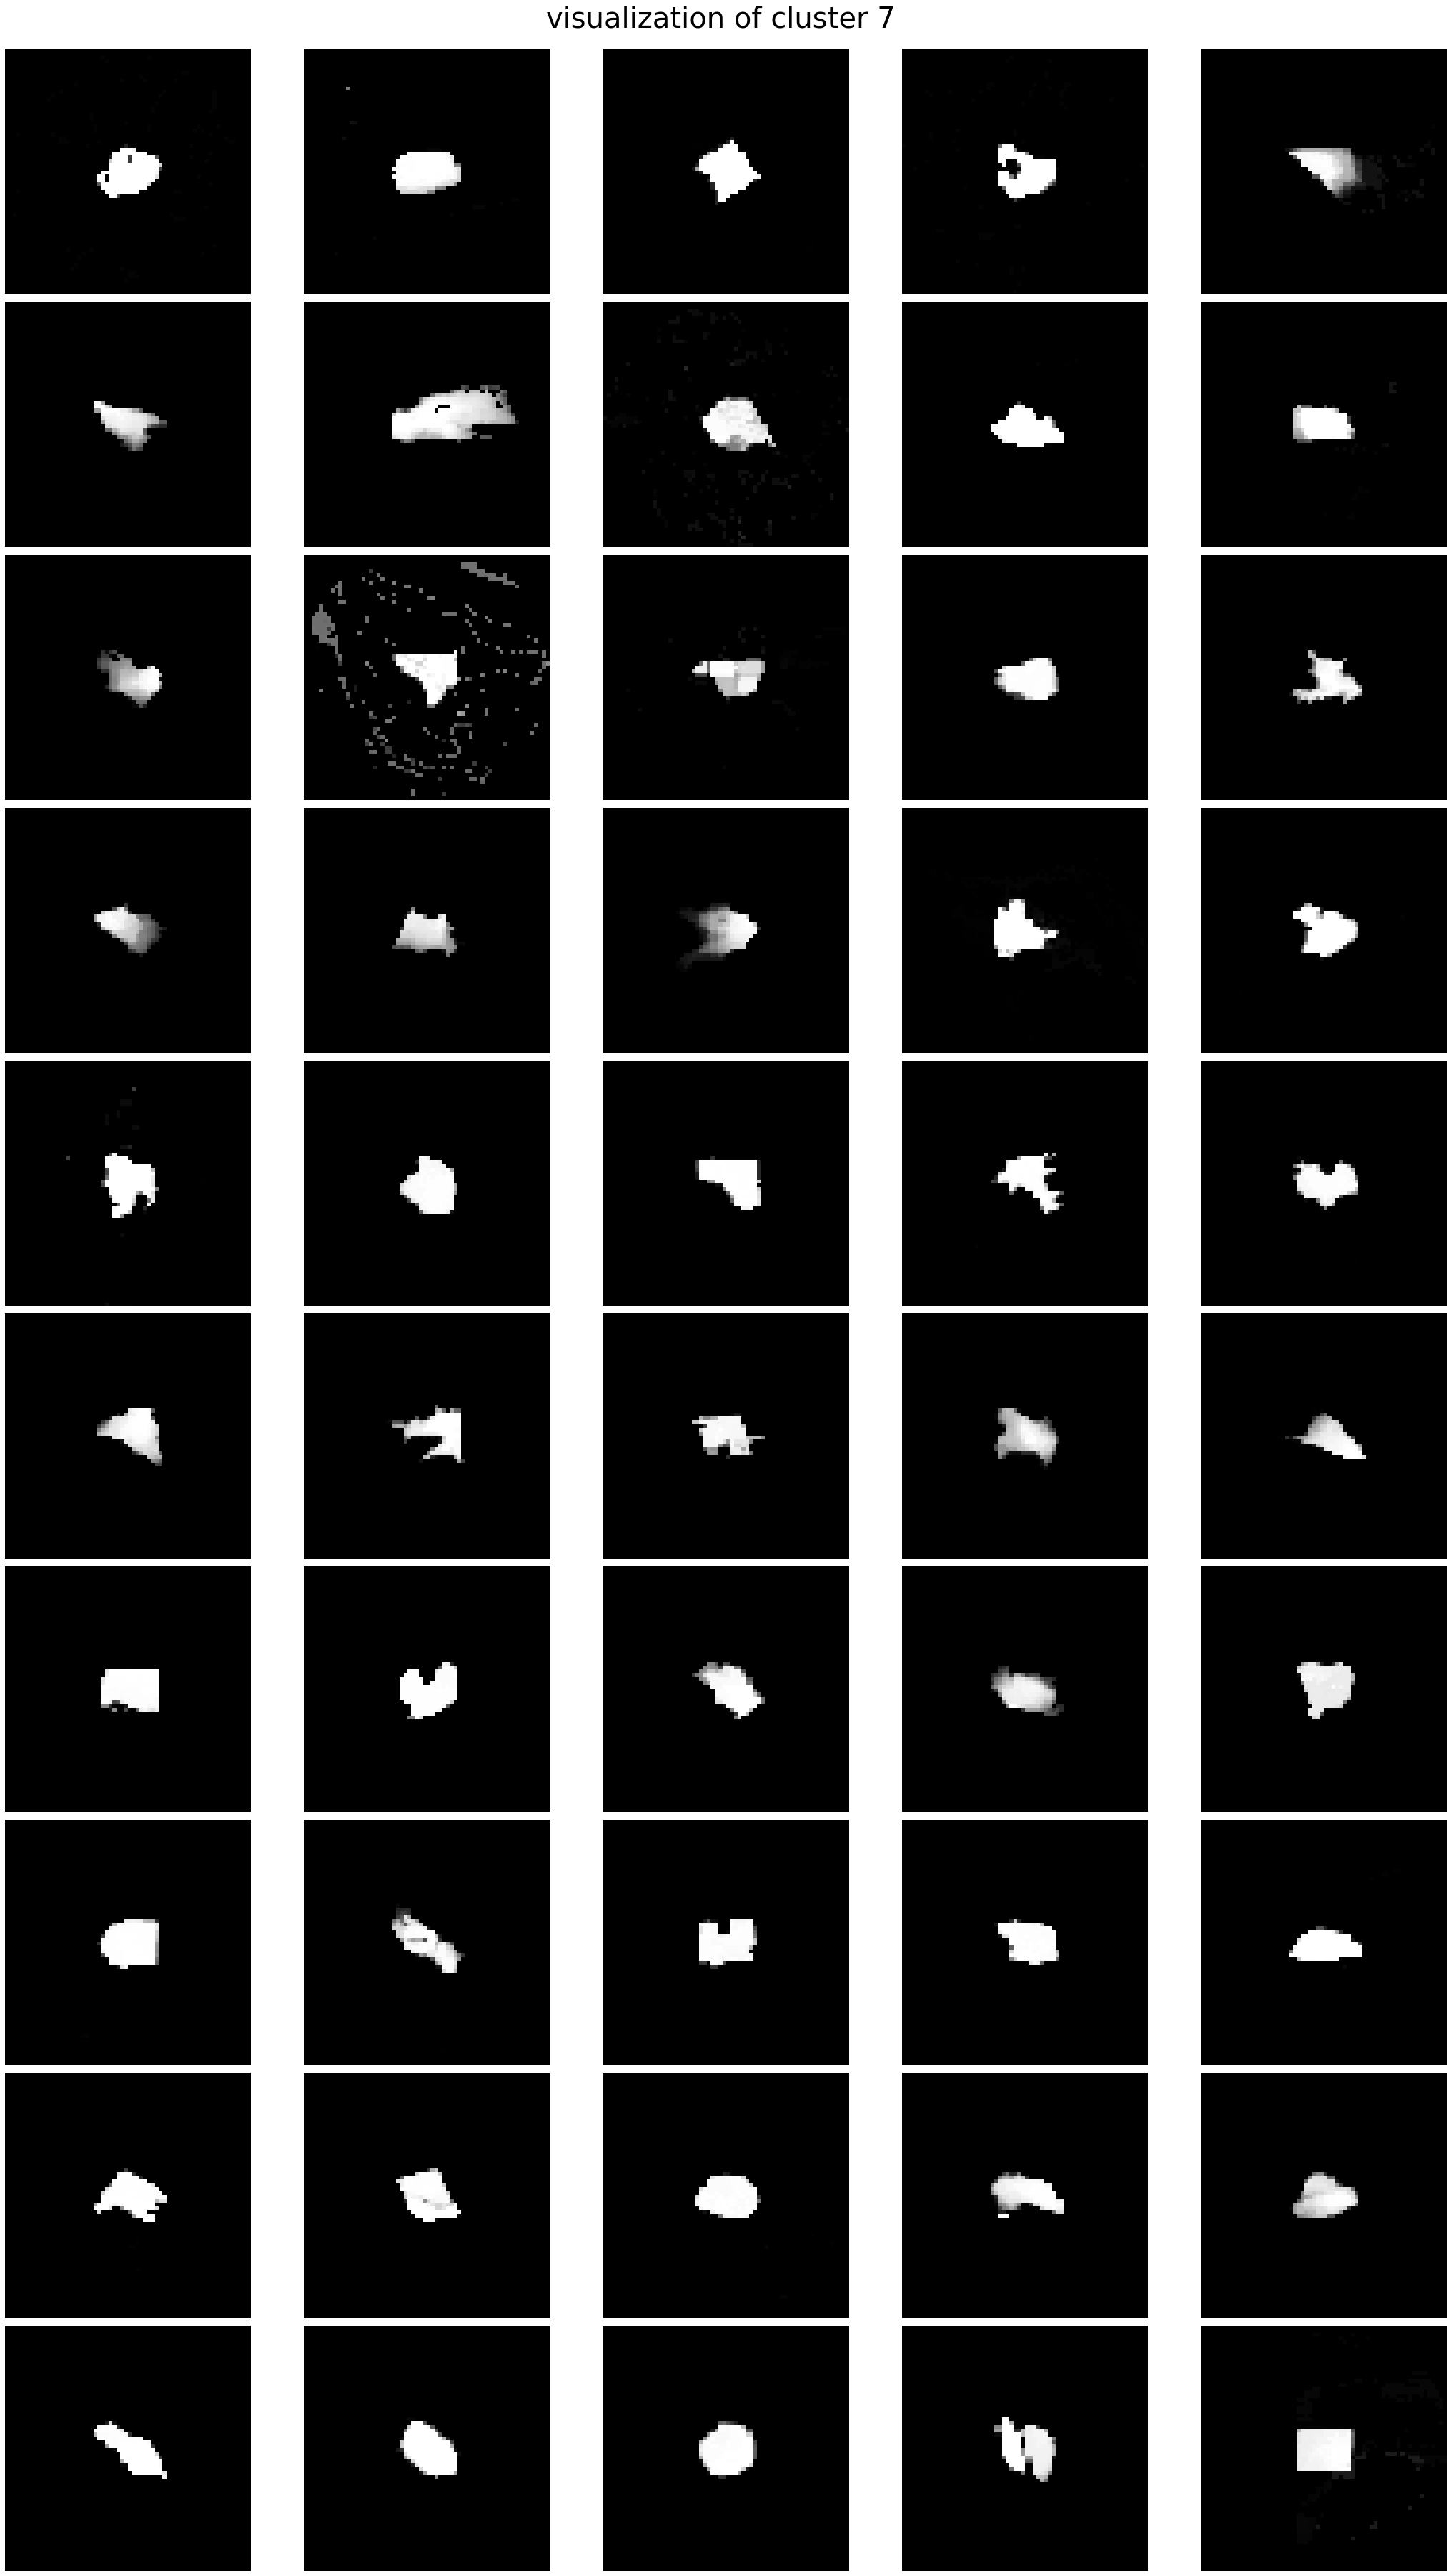

In [80]:
rows = 10
cols = 5


fig, axes = plt.subplots(rows, cols, figsize=(30,50))
fig.suptitle("visualization of cluster 7 ",y=1.0,fontsize=40,ha='center')
ax = axes.ravel()
for i in range(0, 50):
    im = (X_all_train[cluster7_ids[i]]).reshape((64,64))
    ax[i].imshow(im)

for a in ax:
        a.set_axis_off()

plt.tight_layout()
plt.show() 


In [ ]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
# visualize the clusters
import matplotlib.pyplot as plt
 
# #filter rows of original data
# filtered_label0 = df[label == 0]
# print(filtered_label0.shape) # (2274,2)
# #plotting the results
# plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
# plt.show()

In [ ]:
#filter rows of original data
# filtered_label2 = df[label == 2]
 
# filtered_label7 = df[label == 7]
 
# #Plotting the results
# plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
# plt.scatter(filtered_label7[:,0] , filtered_label7[:,1] , color = 'black')
# plt.show()

In [ ]:
#Getting unique labels
 
# u_labels = np.unique(label)
 
# #plotting the results:
 
# for i in u_labels:
#     plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
# plt.legend()
# plt.show()

The images are classified into clusters based on similarity of pixel values. Each image is assigned a cluster label value given by kmeans.labels_. So kmeans.labels_ is an array of length 26754 as there are 26754 images in the training set.

In [ ]:
number_labels = kmeans.labels_
print(np.unique(number_labels))
print(y_train)
for i in range(0, len(kmeans.labels_)):
    number_labels[i] = kmeans.labels_[i] + 1

print(np.unique(number_labels))

In [ ]:
from sklearn.metrics import accuracy_score

# It counts the undefined into consideration, may need to remove those data points for computing accuracy
print(accuracy_score(y_train, number_labels)) # accuracy_score(y_true, y_pred)

Reference: https://medium.com/@joel_34096/k-means-clustering-for-image-classification-a648f28bdc47

In [ ]:
# Comparing Predicted values and Actual values
# print(number_labels[:20].astype('int'))
# print(y_train[:20])

In [ ]:
#label = kmeans.fit_predict(df)
from sklearn import metrics
def calculate_metrics(model,output):
    print('Number of clusters is {}'.format(model.n_clusters))
    print('Inertia : {}'.format(model.inertia_))
    print('Homogeneity :       {}'.format(metrics.homogeneity_score(output,model.labels_)))

In [ ]:
print(y_all.shape)

In [ ]:
# using the elbow method to decide the optimal number of clusters
sse = []
list_k = list(range(1, 11))

for k in list_k:
    km = MiniBatchKMeans(n_clusters=k) # kmeans = MiniBatchKMeans(n_clusters = total_clusters)
    # Fitting the model to training set
#     km.fit(X_train)
    km.fit(X_all_train)
    calculate_metrics(km, y_all)
    sse.append(km.inertia_)
    
    number_labels = km.labels_

    for i in range(0, len(km.labels_)):
        number_labels[i] = km.labels_[i] + 1
    
#     print("k = " + str(k) + ":", accuracy_score(y_train, number_labels)) 
    # accuracy score doesn't matter if we seen it as unsupervised, no labels at all
    

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters k')
plt.ylabel('Sum of squared distance');

In [ ]:
# only calculating river accuracy since we have some labels
km = MiniBatchKMeans(n_clusters=2) # river vs non-river
km.fit(X_all_train)
number_labels = km.labels_
print(number_labels)

y_train_river = []

for i in range(0, len(fms)):
    if (ID_labels[getID(fm_filename, i)] == 3):
        y_train_river.append(0)
    else:
        y_train_river.append(1)
    
y_train_river = np.array(y_train_river)
print(y_train_river.shape)
print(accuracy_score(y_train_river, number_labels)) 

In [ ]:
# visualize kmeans helper function 
def visualize_kmeans(num_clusters, data):

    pca = PCA(2)

    #Transform the data
    df = pca.fit_transform(data)

    #Initialize the class object
    kmeans = KMeans(n_clusters= num_clusters)

    #predict the labels of clusters.
    label = kmeans.fit_predict(df)
    
    #Getting the Centroids
    centroids = kmeans.cluster_centers_
    u_labels = np.unique(label)
 
    #Getting unique labels
    u_labels = np.unique(label)

    #plotting the results:
    for i in u_labels:
        plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
        plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    plt.legend()
    plt.show()

In [ ]:
# X_all_train, X_train
visualize_kmeans(2, X_all_train)

In [ ]:
visualize_kmeans(8, X_all_train)

### Apply pretrained model on ImageNET VGG19

In [ ]:
import torchvision.models as models

In [ ]:
model_ft = models.vgg19(pretrained=True) #224x224

In [ ]:
# resize image from 64*64 to 224x224 to match the input


In [ ]:
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)
#model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
            running_loss = 0.0
            running_corrects = 0
            # Iterate over data.
            for inputs, labels in trainloader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()
            epoch_loss = running_loss / dataset_sizes
            epoch_acc = running_corrects.double() / dataset_sizes
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            # deep copy the model
        print()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)